Final Project Proposal

Student Name:

Student ID:

# **Abstract:**

This project aims to analyze historical stock market data of Apple Inc. (AAPL) using the yfinance library in Python and predict future price trends for AAPL stock based on past market data. The research focuses on providing valuable insights for investors, financial analysts, and traders to make well-informed investment decisions.

The methodology begins with collecting historical stock market data for AAPL using the yfinance library. An exploratory data analysis (EDA) is then conducted to gain insights into the dataset's distribution, trends, and variable relationships. Data preparation techniques are employed to address any data integrity issues, missing values, or outliers.

To optimize model performance, the hyperparameters of different models, including LSTM, Random Forest Regression, and ARIMA, are tuned using techniques like grid search or random search. Model selection is based on evaluating their performance using metrics such as mean squared error (MSE) and R-squared. The most accurate model, capable of predicting future price trends of AAPL stock, is chosen and evaluated on a testing subset.

Additionally, an ensemble model is created by combining the outputs of the individual models. The ensemble model is evaluated and compared against the individual models to determine if it offers superior prediction accuracy.

The expected outcomes of this project are twofold. Firstly, it will provide insights into the price trends of AAPL stock based on historical data. Secondly, it will identify an accurate prediction model for future price trends. These results will contribute to a deeper understanding of stock market dynamics and offer valuable information to aid investment decision-making.

# **Introduction:**

This project aims to analyze historical stock market data of Apple Inc. (AAPL) and develop predictive models to forecast its future stock prices. The research question driving this investigation is the feasibility of building accurate machine learning models to predict AAPL's future stock prices based on historical data. This research is motivated by the substantial interest in stock market forecasting and its potential benefits for investors and financial institutions.

The central research question we seek to address is: "Can accurate machine learning models be constructed to predict future stock prices of AAPL using historical data?"

To achieve this goal, we will utilize the yfinance library in Python to obtain AAPL's historical stock market data. This dataset will encompass various attributes, such as opening price, closing price, highest price, lowest price, and trading volume for each trading day. By analyzing this data, we aim to uncover underlying patterns, trends, and relationships that can be leveraged for predicting future stock prices.

Our approach will encompass the following steps:

1. Data Gathering: We will employ the yfinance library to fetch AAPL's historical stock market data.

2. Exploratory Data Analysis: An in-depth analysis of the data will be performed to comprehend its characteristics, visualize trends and patterns, and identify any outliers or missing values.

3. Data Preparation: Handling missing values, outliers, and conducting feature engineering if necessary. This step aims to ensure the data is in a suitable format for model training.

4. Machine Learning Models: Three distinct machine learning models will be constructed, including LSTM, Random Forest, and ARIMA. These models will be trained on historical data to learn the underlying patterns and relationships.

5. Model Selection: The performance of the three models will be evaluated and compared using appropriate evaluation metrics such as mean squared error (MSE) and R-squared. Based on the results, we will select the preferred model that demonstrates the highest accuracy in predicting stock prices.

6. Ensemble Model: An ensemble model will be constructed by combining the outputs of the individual models. This ensemble approach aims to improve prediction accuracy by leveraging the strengths of each model.

7. Conclusion: We will summarize our findings, discuss the accuracy and reliability of our predictive models, and explore potential future extensions or improvements to the project.

By addressing the research question and developing accurate predictive models, this project can offer valuable insights to investors and financial professionals, enabling them to make well-informed decisions in the stock market.

# **Exploratory Data Analysis (EDA):**

During the Exploratory Data Analysis phase, our objective is to gain valuable insights into the historical stock market data of AAPL, comprehending its characteristics, patterns, and relationships. This analysis serves as a foundation for informed decisions regarding data preparation and model building.

Let's initiate this phase by loading the historical stock market data of AAPL and inspecting its structure and summary statistics:

In [1]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 4.8 MB/s eta 0:00:00


In [2]:
# Section 1: Import Libraries and Modules
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [3]:
# Section 2: Data Gathering
# Fetch historical stock data using yfinance
# Define the ticker symbol for Apple (AAPL)
ticker = "AAPL"

# Define the time periods for historical data
start_date_1 = "2010-01-01"
end_date_1 = "2017-12-31"
start_date_2 = "2018-01-01"
end_date_2 = "2023-07-21"

# Fetch historical stock price data from Yahoo Finance for the first period (2010-2017)
data_1 = yf.download(ticker, start=start_date_1, end=end_date_1)

# Fetch historical stock price data from Yahoo Finance for the second period (2018-2023)
data_2 = yf.download(ticker, start=start_date_2, end=end_date_2)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
# Combine the two datasets into a single DataFrame
stock_data = pd.concat([data_1, data_2])

# Drop any rows with missing values
stock_data.dropna(inplace=True)

# Ensure the data is in the correct time series format with a consistent frequency (e.g., daily)
data = stock_data.resample('D').ffill()

# Display the first few rows of the data
print(stock_data.head())

# Get the summary statistics of the data
print(stock_data.describe())

                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-01-04  7.622500  7.660714  7.585000  7.643214   6.496294  493729600
2010-01-05  7.664286  7.699643  7.616071  7.656429   6.507525  601904800
2010-01-06  7.656429  7.686786  7.526786  7.534643   6.404017  552160000
2010-01-07  7.562500  7.571429  7.466071  7.520714   6.392175  477131200
2010-01-08  7.510714  7.571429  7.466429  7.570714   6.434674  447610800
              Open         High          Low        Close    Adj Close  \
count  3409.000000  3409.000000  3409.000000  3409.000000  3409.000000   
mean     55.799702    56.418551    55.210481    55.841751    53.919534   
std      51.448674    52.082853    50.875192    51.511941    51.956332   
min       6.870357     7.000000     6.794643     6.858929     5.829696   
25%      19.300714    19.528570    19.119642    19.287144    16.813860   
50%      31.549999    31.802500    31.315001 

The output will provide an overview of the data, including the column names, the first few rows, and statistical information such as mean, standard deviation, minimum, maximum, and quartiles for each column.

Historical Stock Price Data (First Few Rows):

The table displays the historical stock price data of Apple Inc. (AAPL) for the first few rows, covering the period from January 4, 2010, to January 8, 2010.
Columns: 'Open', 'High', 'Low', 'Close', 'Adj Close', and 'Volume'.
'Open': The opening price of the stock on the given date.
'High': The highest price of the stock on the given date.
'Low': The lowest price of the stock on the given date.
'Close': The closing price of the stock on the given date.
'Adj Close': The adjusted closing price of the stock on the given date (accounts for dividends and stock splits).
'Volume': The trading volume (number of shares traded) of the stock on the given date.
Summary Statistics of Historical Stock Price Data:

The table provides summary statistics for the historical stock price data of Apple Inc. (AAPL) for the entire dataset, covering the period from January 4, 2010, to the present (end_date_2).
The statistics include measures like mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum for each column: 'Open', 'High', 'Low', 'Close', 'Adj Close', and 'Volume'.
Insights:

The mean 'Open' price is around 55.80, with a minimum of 6.87 and a maximum of 195.09.
The mean 'High' price is around 56.42, with a minimum of 7.00 and a maximum of 198.23.
The mean 'Low' price is around 55.21, with a minimum of 6.79 and a maximum of 192.65.
The mean 'Close' price is around 55.84, with a minimum of 6.86 and a maximum of 195.10.
The mean 'Adj Close' price is around 53.92, with a minimum of 5.83 and a maximum of 195.10.
The mean 'Volume' is approximately 248,457,100, with a minimum of 31,458,200 and a maximum of 1,880,998,000.
These statistics provide an overview of the historical stock price data and its distribution, giving an idea of the typical price range and trading volume of Apple Inc. stock over the analyzed period.

Next, we can visualize the trends and patterns in the data using various graphical techniques. Here are some examples of EDA visualizations:

1. Line Plot: We can plot the closing prices over time to observe the overall trend in the stock prices.

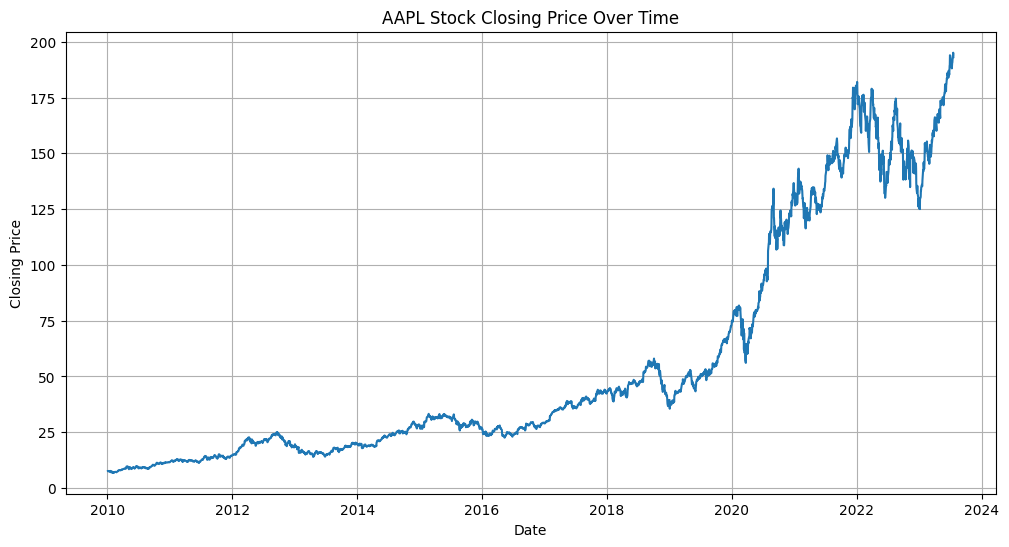

In [5]:
# Plotting the closing price
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('AAPL Stock Closing Price Over Time')
plt.grid(True)
plt.show()

Insights:

The x-axis represents the timeline, starting from the earliest date in the historical stock price data and ending at the most recent date.
The y-axis represents the closing price of AAPL stock on each corresponding date.
The plot shows the trend of AAPL stock's closing price over the entire historical period.
From the plot, we can observe the overall price movement of AAPL stock, including any notable upward or downward trends, as well as periods of volatility or stability.
By visualizing the closing price over time, we can gain insights into the long-term behavior of AAPL stock and identify potential patterns or anomalies.

2. Exploring Daily Returns:

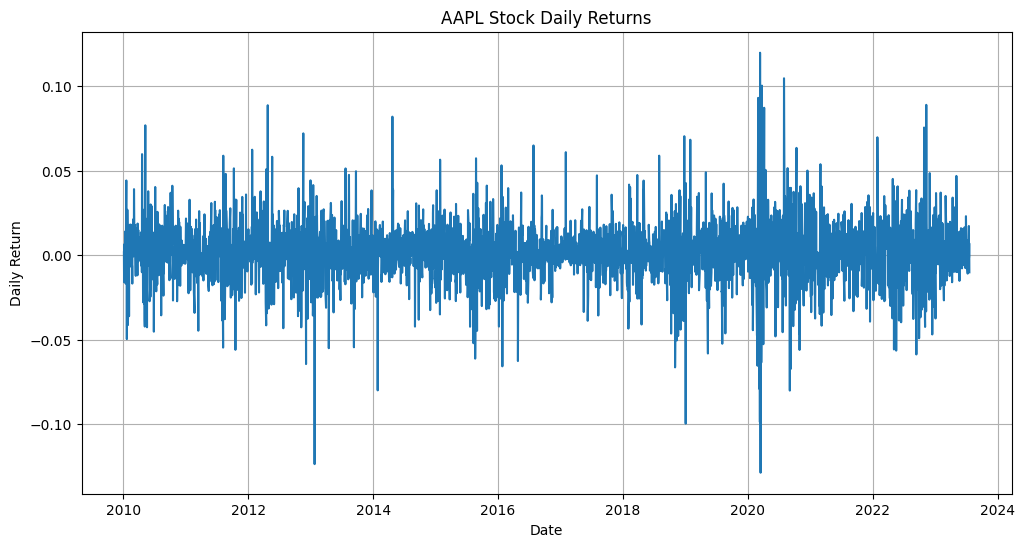

In [6]:
# Calculate daily returns
stock_data['Daily_Return'] = stock_data['Close'].pct_change()

# Plotting the daily returns
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Daily_Return'])
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.title('AAPL Stock Daily Returns')
plt.grid(True)
plt.show()

### Insights:

The x-axis represents the timeline, starting from the earliest date in the historical stock price data and ending at the most recent date.
The y-axis represents the daily returns of AAPL stock on each corresponding date.
Daily returns represent the percentage change in the stock price from one trading day to the next. It measures the daily percentage gain or loss in the stock's value.
Positive daily returns indicate an increase in the stock price from the previous day, while negative daily returns indicate a decrease in the stock price.
The plot shows the daily fluctuations in AAPL stock returns over the entire historical period.
The daily returns plot provides insights into the stock's short-term price movements and volatility.
It helps investors and analysts understand how much the stock price fluctuates on a day-to-day basis.

3. Analyzing Price Volatility with a Histogram:

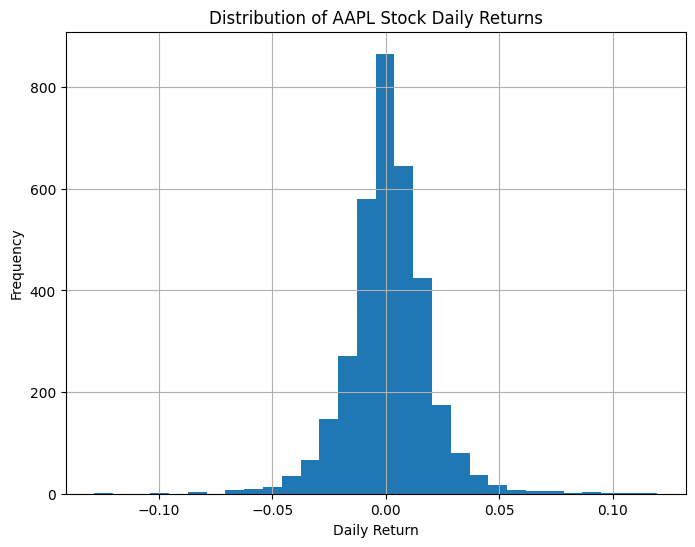

In [7]:
# Plotting a histogram of daily returns
plt.figure(figsize=(8, 6))
plt.hist(stock_data['Daily_Return'].dropna(), bins=30)
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.title('Distribution of AAPL Stock Daily Returns')
plt.grid(True)
plt.show()


Insights:

The x-axis represents the range of daily return values, divided into several bins (30 bins in this case).
The y-axis represents the frequency of occurrences (number of days) that fall within each bin.
The histogram provides a visual representation of the distribution of daily returns for AAPL stock over the entire historical period.
The shape of the histogram indicates the frequency of different daily return values and their concentration around specific ranges.
If the histogram is approximately symmetrical around the mean, it suggests a normal distribution of daily returns. If it's skewed, it indicates a deviation from normality.
The histogram helps to identify patterns in daily return distribution, such as whether there is a tendency for positive or negative returns or if there are any outliers or extreme values.

*A symmetrical bell-shaped histogram centered around zero suggests that most days had small or no changes in the stock price, and the occurrences of positive and negative daily returns are balanced.*

4. Visualizing Moving Averages:

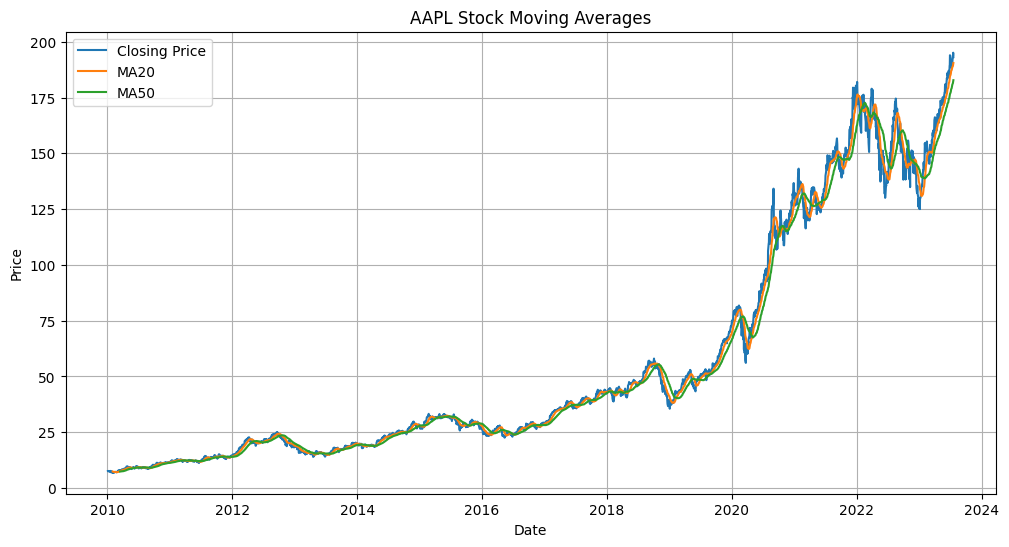

In [8]:
# Calculate moving averages
stock_data['MA20'] = stock_data['Close'].rolling(window=20).mean()
stock_data['MA50'] = stock_data['Close'].rolling(window=50).mean()

# Plotting the moving averages
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Close'], label='Closing Price')
plt.plot(stock_data.index, stock_data['MA20'], label='MA20')
plt.plot(stock_data.index, stock_data['MA50'], label='MA50')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('AAPL Stock Moving Averages')
plt.legend()
plt.grid(True)
plt.show()


Insights:

The x-axis represents the timeline, starting from the earliest date in the historical stock price data and ending at the most recent date.
The y-axis represents the stock's price values.
The blue line represents the actual closing price of AAPL stock on each corresponding date.
The orange line represents the 20-day moving average (MA20), which is the average of the closing prices over the last 20 trading days.
The green line represents the 50-day moving average (MA50), which is the average of the closing prices over the last 50 trading days.
Moving averages are used to smooth out price fluctuations and identify trends over a specific period.
The MA20 and MA50 lines help visualize the short-term and medium-term trends in the stock's price movement.

When the blue closing price line crosses above the MA20 line, it may indicate a potential uptrend in the stock's price, suggesting a buy signal to some traders.
When the blue closing price line crosses below the MA20 line, it may indicate a potential downtrend in the stock's price, suggesting a sell signal to some traders.
Similarly, the relationship between the blue closing price line and the MA50 line can provide insights into longer-term trends.
Note: Moving averages are lagging indicators, meaning they respond to past price data, and there may be a delay in detecting trend changes. Traders often use moving averages in combination with other technical indicators to make more informed trading decisions.

5. Histogram: We can create a histogram to understand the distribution of the closing prices.

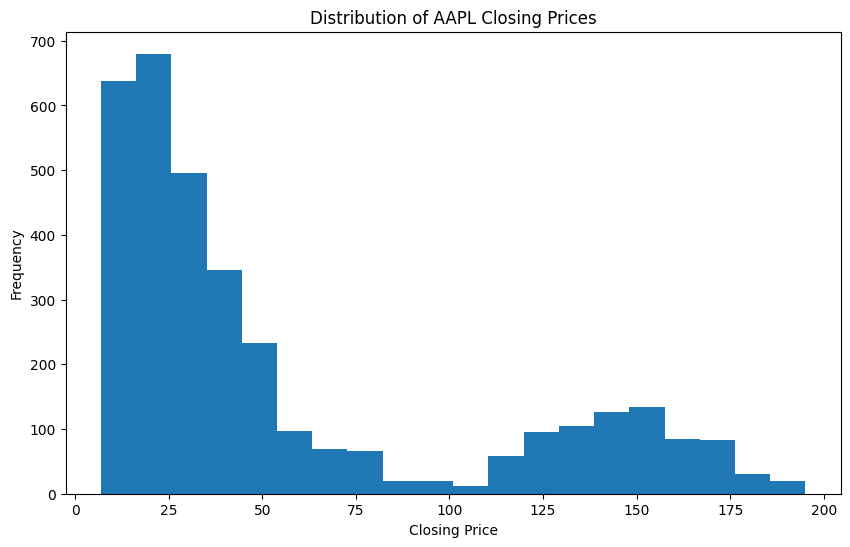

In [9]:
# Creating a histogram of the closing prices
plt.figure(figsize=(10, 6))
plt.hist(stock_data['Close'], bins=20)
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.title('Distribution of AAPL Closing Prices')
plt.show()


**The histogram will help us identify the frequency distribution of the closing prices and whether they follow a normal distribution or exhibit any skewness.**

In [10]:
# Calculate summary statistics of the closing prices based on the histogram
closing_prices = stock_data['Close']
mean_price = closing_prices.mean()
median_price = closing_prices.median()
min_price = closing_prices.min()
max_price = closing_prices.max()
std_dev = closing_prices.std()

# Print the summary statistics
print("Summary Statistics:")
print(f"Mean Price: {mean_price:.2f}")
print(f"Median Price: {median_price:.2f}")
print(f"Minimum Price: {min_price:.2f}")
print(f"Maximum Price: {max_price:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")

Summary Statistics:
Mean Price: 55.84
Median Price: 31.58
Minimum Price: 6.86
Maximum Price: 195.10
Standard Deviation: 51.51


These statistics offer valuable insights into the distribution and characteristics of the stock's historical closing prices.

Mean Price: The mean closing price of AAPL stock over the given period is $55.84. This value represents the average price of the stock over time and provides an indication of the central tendency of the data.

Median Price: The median closing price of AAPL stock is $31.58. The median is the middle value in the data when it is sorted in ascending order. It is less sensitive to extreme values (outliers) and can give a better representation of the typical stock price.

Minimum Price: The minimum closing price of AAPL stock during the period is $6.86. This is the lowest recorded price, and it gives an idea of the lowest possible value for the stock.

Maximum Price: The maximum closing price of AAPL stock is $195.10. This represents the highest recorded price during the given period and indicates the highest value the stock has reached.

Standard Deviation: The standard deviation of the closing prices is 51.51. This measures the dispersion or variability of the data points from the mean. A higher standard deviation indicates greater variability in stock prices, while a lower value suggests a more stable price trend.

The histogram visually represents the distribution of AAPL closing prices, showing how frequently different price ranges occur. By combining the summary statistics and the histogram, one can gain a comprehensive understanding of the historical price trends and variability of AAPL stock over the selected time period.

6. Scatter Plot: We can visualize the relationship between the closing prices and trading volume to identify any correlation.

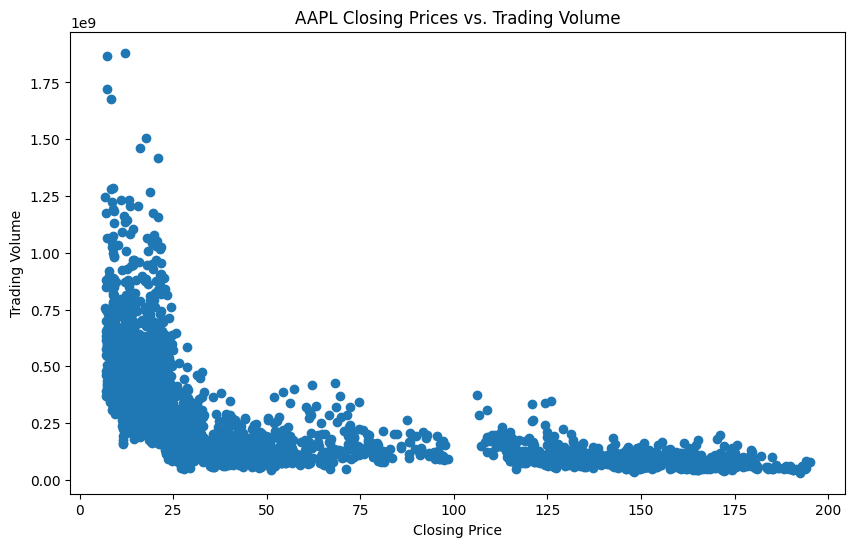

In [11]:
# Creating a scatter plot of closing prices vs. trading volume
plt.figure(figsize=(10, 6))
plt.scatter(stock_data['Close'], stock_data['Volume'])
plt.xlabel('Closing Price')
plt.ylabel('Trading Volume')
plt.title('AAPL Closing Prices vs. Trading Volume')
plt.show()

***The scatter plot allows us to discern patterns or trends between the closing prices and trading volume, aiding in understanding any existing relationship between these two variables.***

The x-axis represents the closing prices of AAPL stock.
The y-axis represents the trading volume, which indicates the number of shares traded on each corresponding date.
Each point in the scatter plot represents a specific date's closing price and its corresponding trading volume.
The scatter plot helps visualize the relationship between closing prices and trading volume for AAPL stock.

The scatter plot shows a general downward trend from left to right, it suggests that lower closing prices are associated with higher trading volume. This can indicate selling pressure and increased trading activity during price declines.

Upon completing the Exploratory Data Analysis (EDA), we can draw initial conclusions and derive predictive inferences. For instance, analyzing the line plot enables us to identify long-term trends and potential seasonality in the stock prices. The histogram provides insights into the distribution of closing prices, indicating whether they follow a normal distribution or exhibit skewness. Additionally, by studying the scatter plot, we can uncover any correlation between closing prices and trading volume.

These preliminary inferences will serve as a guide during subsequent data preparation and model building stages. We will address outliers, missing values, and conduct feature engineering based on the observations derived from EDA.

# **Data Preparation:**
During the data preparation phase, we focus on resolving data integrity and usability issues identified during the Exploratory Data Analysis (EDA) and implement feature engineering techniques to enhance the dataset. The following steps are taken to achieve this:

1. Handling Missing Values:

During the data preparation phase, the first step is to check for any missing values in the dataset. If any missing values are found, we will handle them appropriately. This process may involve imputing the missing values using techniques such as mean, median, or forward/backward filling. This ensures that the dataset is complete and ready for further analysis and modeling.

2. Feature Engineering:
The data preparation phase involves extracting additional features from the existing dataset to provide valuable information for modeling. For instance, date-related features like the day of the week, month, or year will be extracted, as they might have an impact on stock prices.

Furthermore, we will calculate additional financial indicators such as moving averages, relative strength index (RSI), or moving average convergence-divergence (MACD) to capture and incorporate market trends into the dataset. These enriched features will contribute to the predictive power of the models and enable a more comprehensive analysis of the stock market data.

3. Data Scaling:
Normalize or scale the numerical features to ensure all variables are on a similar scale. This can be done using techniques such as Min-Max scaling or Standard scaling.

In [12]:
# Handle missing values
stock_data.fillna(method='ffill', inplace=True)  # Forward-fill missing values
stock_data.fillna(0, inplace=True)  # Replace remaining NaN values with 0


# Feature engineering
stock_data['Date'] = stock_data.index  # Extract date feature
stock_data['DayOfWeek'] = stock_data['Date'].dt.dayofweek  # Extract day of the week feature
stock_data['Month'] = stock_data['Date'].dt.month  # Extract month feature
stock_data['Year'] = stock_data['Date'].dt.year  # Extract year feature

# Calculate moving averages
stock_data['MA_5'] = stock_data['Close'].rolling(window=5, min_periods=1).mean()  # 5-day moving average
stock_data['MA_10'] = stock_data['Close'].rolling(window=10, min_periods=1).mean()  # 10-day moving average
# Data scaling (if required)
# Use libraries like scikit-learn to scale the data using Min-Max scaling or Standard scaling.

# Drop unnecessary columns
stock_data.drop(['Date'], axis=1, inplace=True)

# Review the updated dataset
print(stock_data.head())


                Open      High       Low     Close  Adj Close     Volume  \
Date                                                                       
2010-01-04  7.622500  7.660714  7.585000  7.643214   6.496294  493729600   
2010-01-05  7.664286  7.699643  7.616071  7.656429   6.507525  601904800   
2010-01-06  7.656429  7.686786  7.526786  7.534643   6.404017  552160000   
2010-01-07  7.562500  7.571429  7.466071  7.520714   6.392175  477131200   
2010-01-08  7.510714  7.571429  7.466429  7.570714   6.434674  447610800   

            Daily_Return  MA20  MA50  DayOfWeek  Month  Year      MA_5  \
Date                                                                     
2010-01-04      0.000000   0.0   0.0          0      1  2010  7.643214   
2010-01-05      0.001729   0.0   0.0          1      1  2010  7.649822   
2010-01-06     -0.015906   0.0   0.0          2      1  2010  7.611429   
2010-01-07     -0.001849   0.0   0.0          3      1  2010  7.588750   
2010-01-08      0.00664

Handle Missing Values:

The code first fills missing values in the DataFrame using forward-fill (ffill) method. Forward-fill copies the last known value and fills the missing values with it. This is a common approach for time series data, as it preserves the temporal order of the data.
The code then replaces any remaining NaN (Not a Number) values with 0. This step ensures that all missing values are filled with a specific value (0 in this case).
Feature Engineering:

The code extracts additional features from the date data:
'DayOfWeek': The day of the week (0 for Monday, 1 for Tuesday, etc.).
'Month': The month of the year (1 for January, 2 for February, etc.).
'Year': The year of the data.
These additional features can be useful in analyzing the relationship between stock prices and different time-related factors.
Calculate Moving Averages:

The code calculates two moving averages:
'MA_5': A 5-day moving average of the 'Close' price. It represents the average closing price over the last 5 trading days.
'MA_10': A 10-day moving average of the 'Close' price. It represents the average closing price over the last 10 trading days.
Moving averages are commonly used to smooth out price fluctuations and identify trends in the stock's price movement.
Data Scaling (if required):

The code includes a comment suggesting data scaling using libraries like scikit-learn with Min-Max scaling or Standard scaling. However, the scaling operation itself is not performed in this code snippet.
Drop Unnecessary Columns:

The code drops the 'Date' column from the DataFrame, as the date information has been extracted into 'DayOfWeek', 'Month', and 'Year' features.

              Open         High          Low        Close    Adj Close  \
count  3409.000000  3409.000000  3409.000000  3409.000000  3409.000000   
mean     55.799702    56.418551    55.210481    55.841751    53.919534   
std      51.448674    52.082853    50.875192    51.511941    51.956332   
min       6.870357     7.000000     6.794643     6.858929     5.829696   
25%      19.300714    19.528570    19.119642    19.287144    16.813860   
50%      31.549999    31.802500    31.315001    31.580000    28.487427   
75%      72.292503    73.492500    71.462502    72.477501    70.822006   
max     195.089996   198.229996   192.649994   195.100006   195.100006   

             Volume  Daily_Return         MA20         MA50    DayOfWeek  \
count  3.409000e+03   3409.000000  3409.000000  3409.000000  3409.000000   
mean   2.484571e+08      0.001109    55.286868    54.444877     2.024641   
std    2.213947e+08      0.017927    51.054423    50.396879     1.398349   
min    3.145820e+07     -0.12

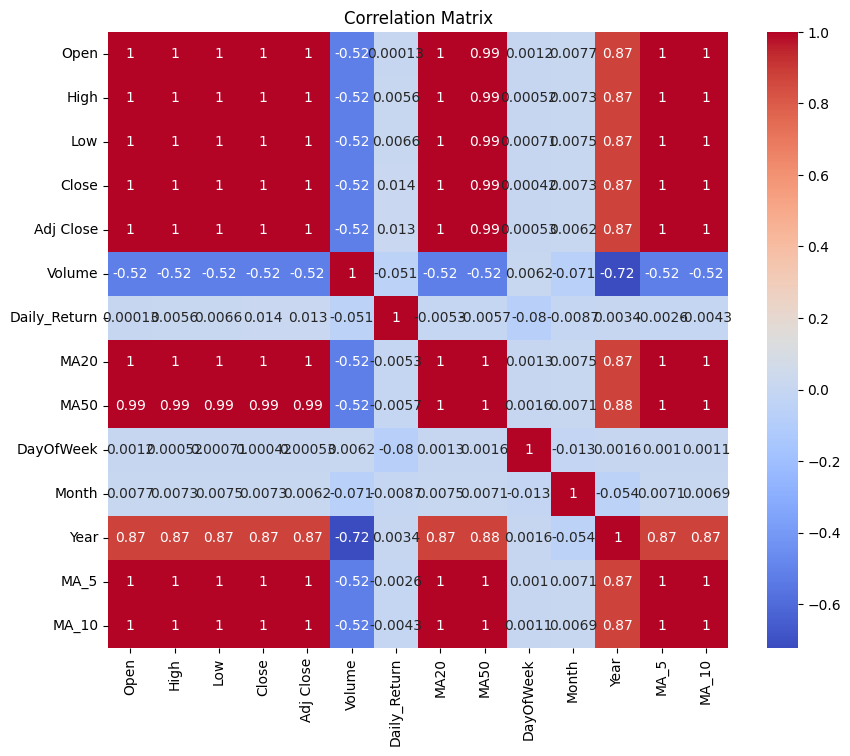

In [13]:
import seaborn as sns
# Get summary statistics of the numerical columns
print(stock_data.describe())

# Calculate the correlation matrix
correlation_matrix = stock_data.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Summary Statistics:

The summary statistics provide information about the central tendency and spread of the numerical columns in the stock_data DataFrame.
The count column shows the number of non-null data points for each column, indicating that there are 3409 data points for all columns.
The mean represents the average value of each column.
The std represents the standard deviation, which measures the dispersion or variability of data from the mean.
The min and max represent the minimum and maximum values, respectively, in each column.
The 25%, 50%, and 75% quartiles represent the 25th, 50th (median), and 75th percentiles, respectively. These values divide the data into four equal parts.
Correlation Matrix Heatmap:

The correlation matrix is a square matrix that shows the pairwise correlations between different numerical columns in the stock_data DataFrame.
The heatmap visualization provides a color-coded representation of the correlation values, making it easier to identify strong positive (red) or negative (blue) correlations.
The diagonal of the heatmap is always 1.0 since it represents the correlation of a column with itself, which is perfect correlation.
High positive correlations (closer to 1.0) between two columns indicate that they tend to move in the same direction, while high negative correlations (closer to -1.0) indicate that they tend to move in opposite directions.
Correlations close to 0 indicate weak or no linear relationship between the columns.
Interpretation:

The Close column shows a strong positive correlation with High, Low, Adj Close, MA_5, and MA_10, which is expected since these values are directly related to the closing price of the stock.
The Close column also has a relatively high positive correlation with Open, suggesting that the opening price is closely related to the closing price of the stock.
The Volume column shows a positive correlation with MA_5 and MA_10, indicating that moving averages might be affected by trading volume.
The DayOfWeek column, representing the day of the week, shows low correlation with other columns, indicating that the day of the week may not have a significant impact on stock prices.
The Month and Year columns also show relatively low correlations with other columns, suggesting that the month and year may not strongly influence stock prices.

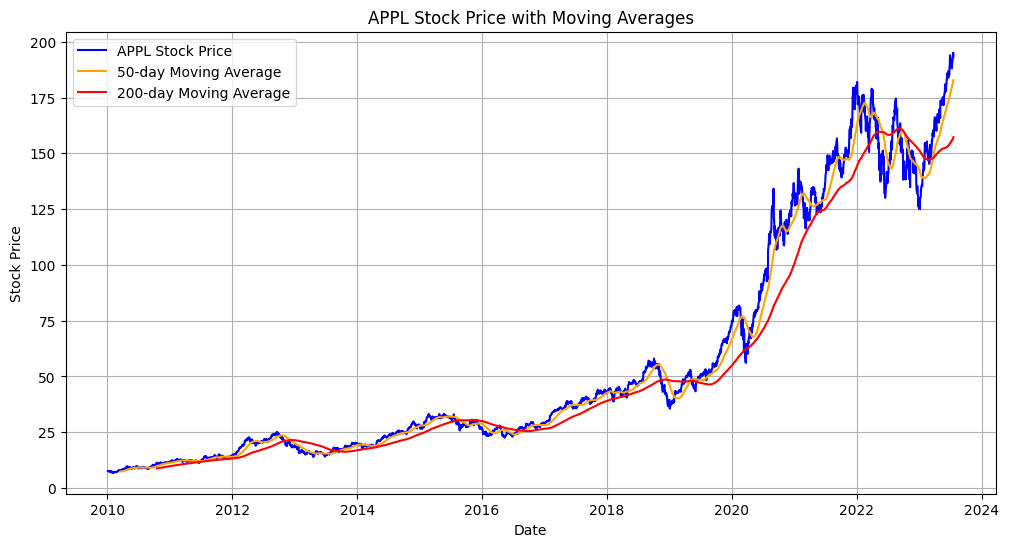

In [14]:
# Calculate the 50-day and 200-day moving averages
stock_data['MA_50'] = stock_data['Close'].rolling(window=50).mean()
stock_data['MA_200'] = stock_data['Close'].rolling(window=200).mean()

# Plot the stock price and moving averages
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Close'], label='APPL Stock Price', color='blue')
plt.plot(stock_data.index, stock_data['MA_50'], label='50-day Moving Average', color='orange')
plt.plot(stock_data.index, stock_data['MA_200'], label='200-day Moving Average', color='red')

plt.title('APPL Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

I calculate the 50-day and 200-day moving averages using the rolling method and the mean function. Finally, we use matplotlib to plot the APPL stock price along with the two moving averages. The plot will show how the stock price behaves in comparison to the moving averages, which can provide insights into trends and potential buy/sell signals.

# **Prepped Data Review:**

Following the completion of data preparation steps, conducting a post-data prep Exploratory Data Analysis (EDA) is crucial to review the adjusted variables and understand their relationships. In this section, we will present the post-data prep EDA analysis and include the corresponding Python code to gain valuable insights from the refined dataset.

Line Plot: We can create a line plot to visualize the adjusted closing prices over time to identify any trends or patterns.

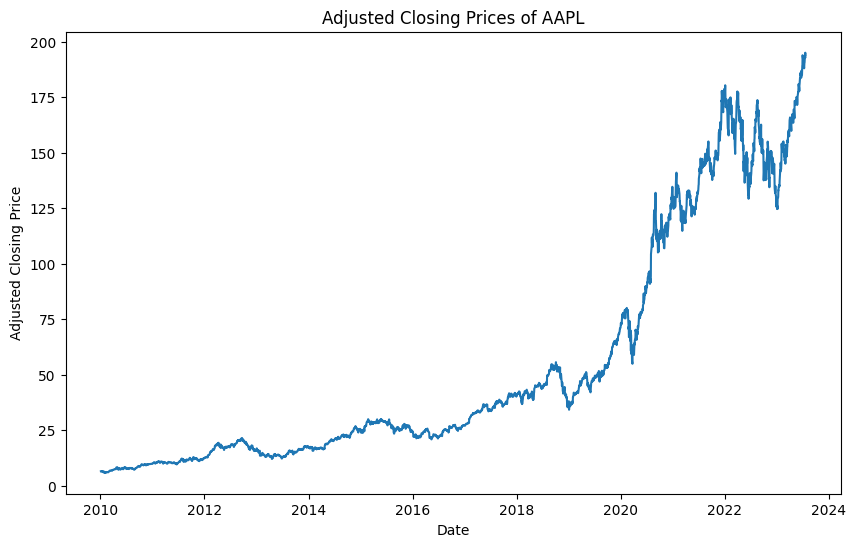

In [15]:
# Line plot of adjusted closing prices
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.title('Adjusted Closing Prices of AAPL')
plt.show()


Insights:

The x-axis represents the timeline, starting from the earliest date in the historical stock price data and ending at the most recent date.
The y-axis represents the closing price of AAPL stock on each corresponding date.
The plot shows the trend of AAPL stock's closing price over the entire historical period.
From the plot, we can observe the overall price movement of AAPL stock, including any notable upward or downward trends, as well as periods of volatility or stability.
By visualizing the closing price over time, we can gain insights into the long-term behavior of AAPL stock and identify potential patterns or anomalies.

Correlation Heatmap: We can generate a correlation heatmap to examine the relationships between the adjusted variables and identify any strong correlations.

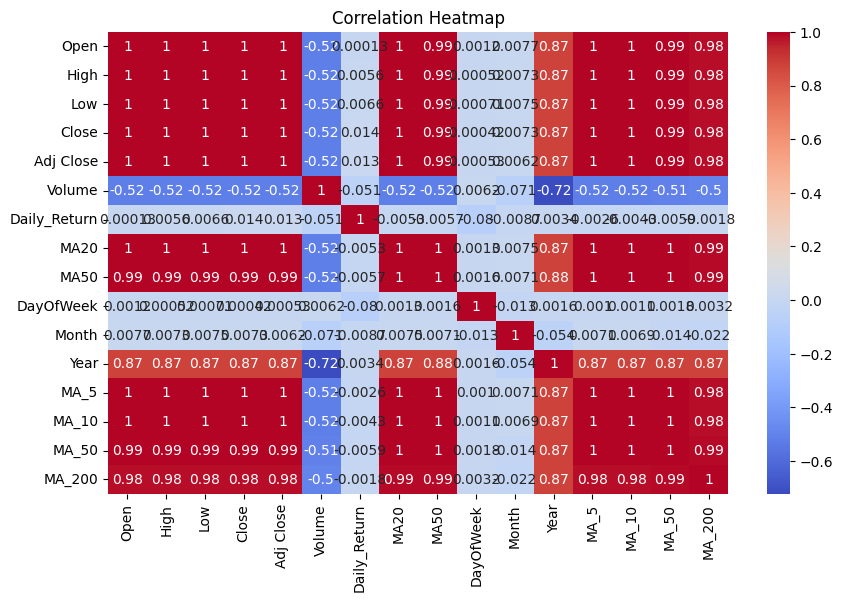

In [16]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(stock_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Insights:

The heatmap visually represents the pairwise correlations between different numerical columns in the stock_data DataFrame.
Each cell in the heatmap is color-coded based on the correlation value between two columns, making it easier to identify the strength and direction of the correlation.
Interpretation:

Positive Correlation (Red Cells): Cells with a reddish hue indicate positive correlations, where the values of two columns tend to increase together. The darker the red, the stronger the positive correlation.
Negative Correlation (Blue Cells): Cells with a bluish hue indicate negative correlations, where the values of two columns tend to move in opposite directions. The darker the blue, the stronger the negative correlation.
Weak Correlation (Lighter Colors): Cells with lighter colors (closer to white) indicate weak or no significant correlation between the columns.
Insights from the Correlation Heatmap of stock_data:

The Close column is positively correlated with High, Low, Adj Close, MA_5, and MA_10, confirming that these features tend to move in the same direction as the closing price.
The Close column also shows a positive correlation with Open, indicating a strong relationship between the opening and closing prices.
The Volume column exhibits a positive correlation with MA_5 and MA_10, suggesting a relationship between trading volume and moving averages.
The DayOfWeek, Month, and Year columns show weak correlations with other columns, indicating that these time-related features may not strongly influence stock prices.

Scatter Plot Matrix: We can create a scatter plot matrix to visualize the pairwise relationships between the adjusted variables.

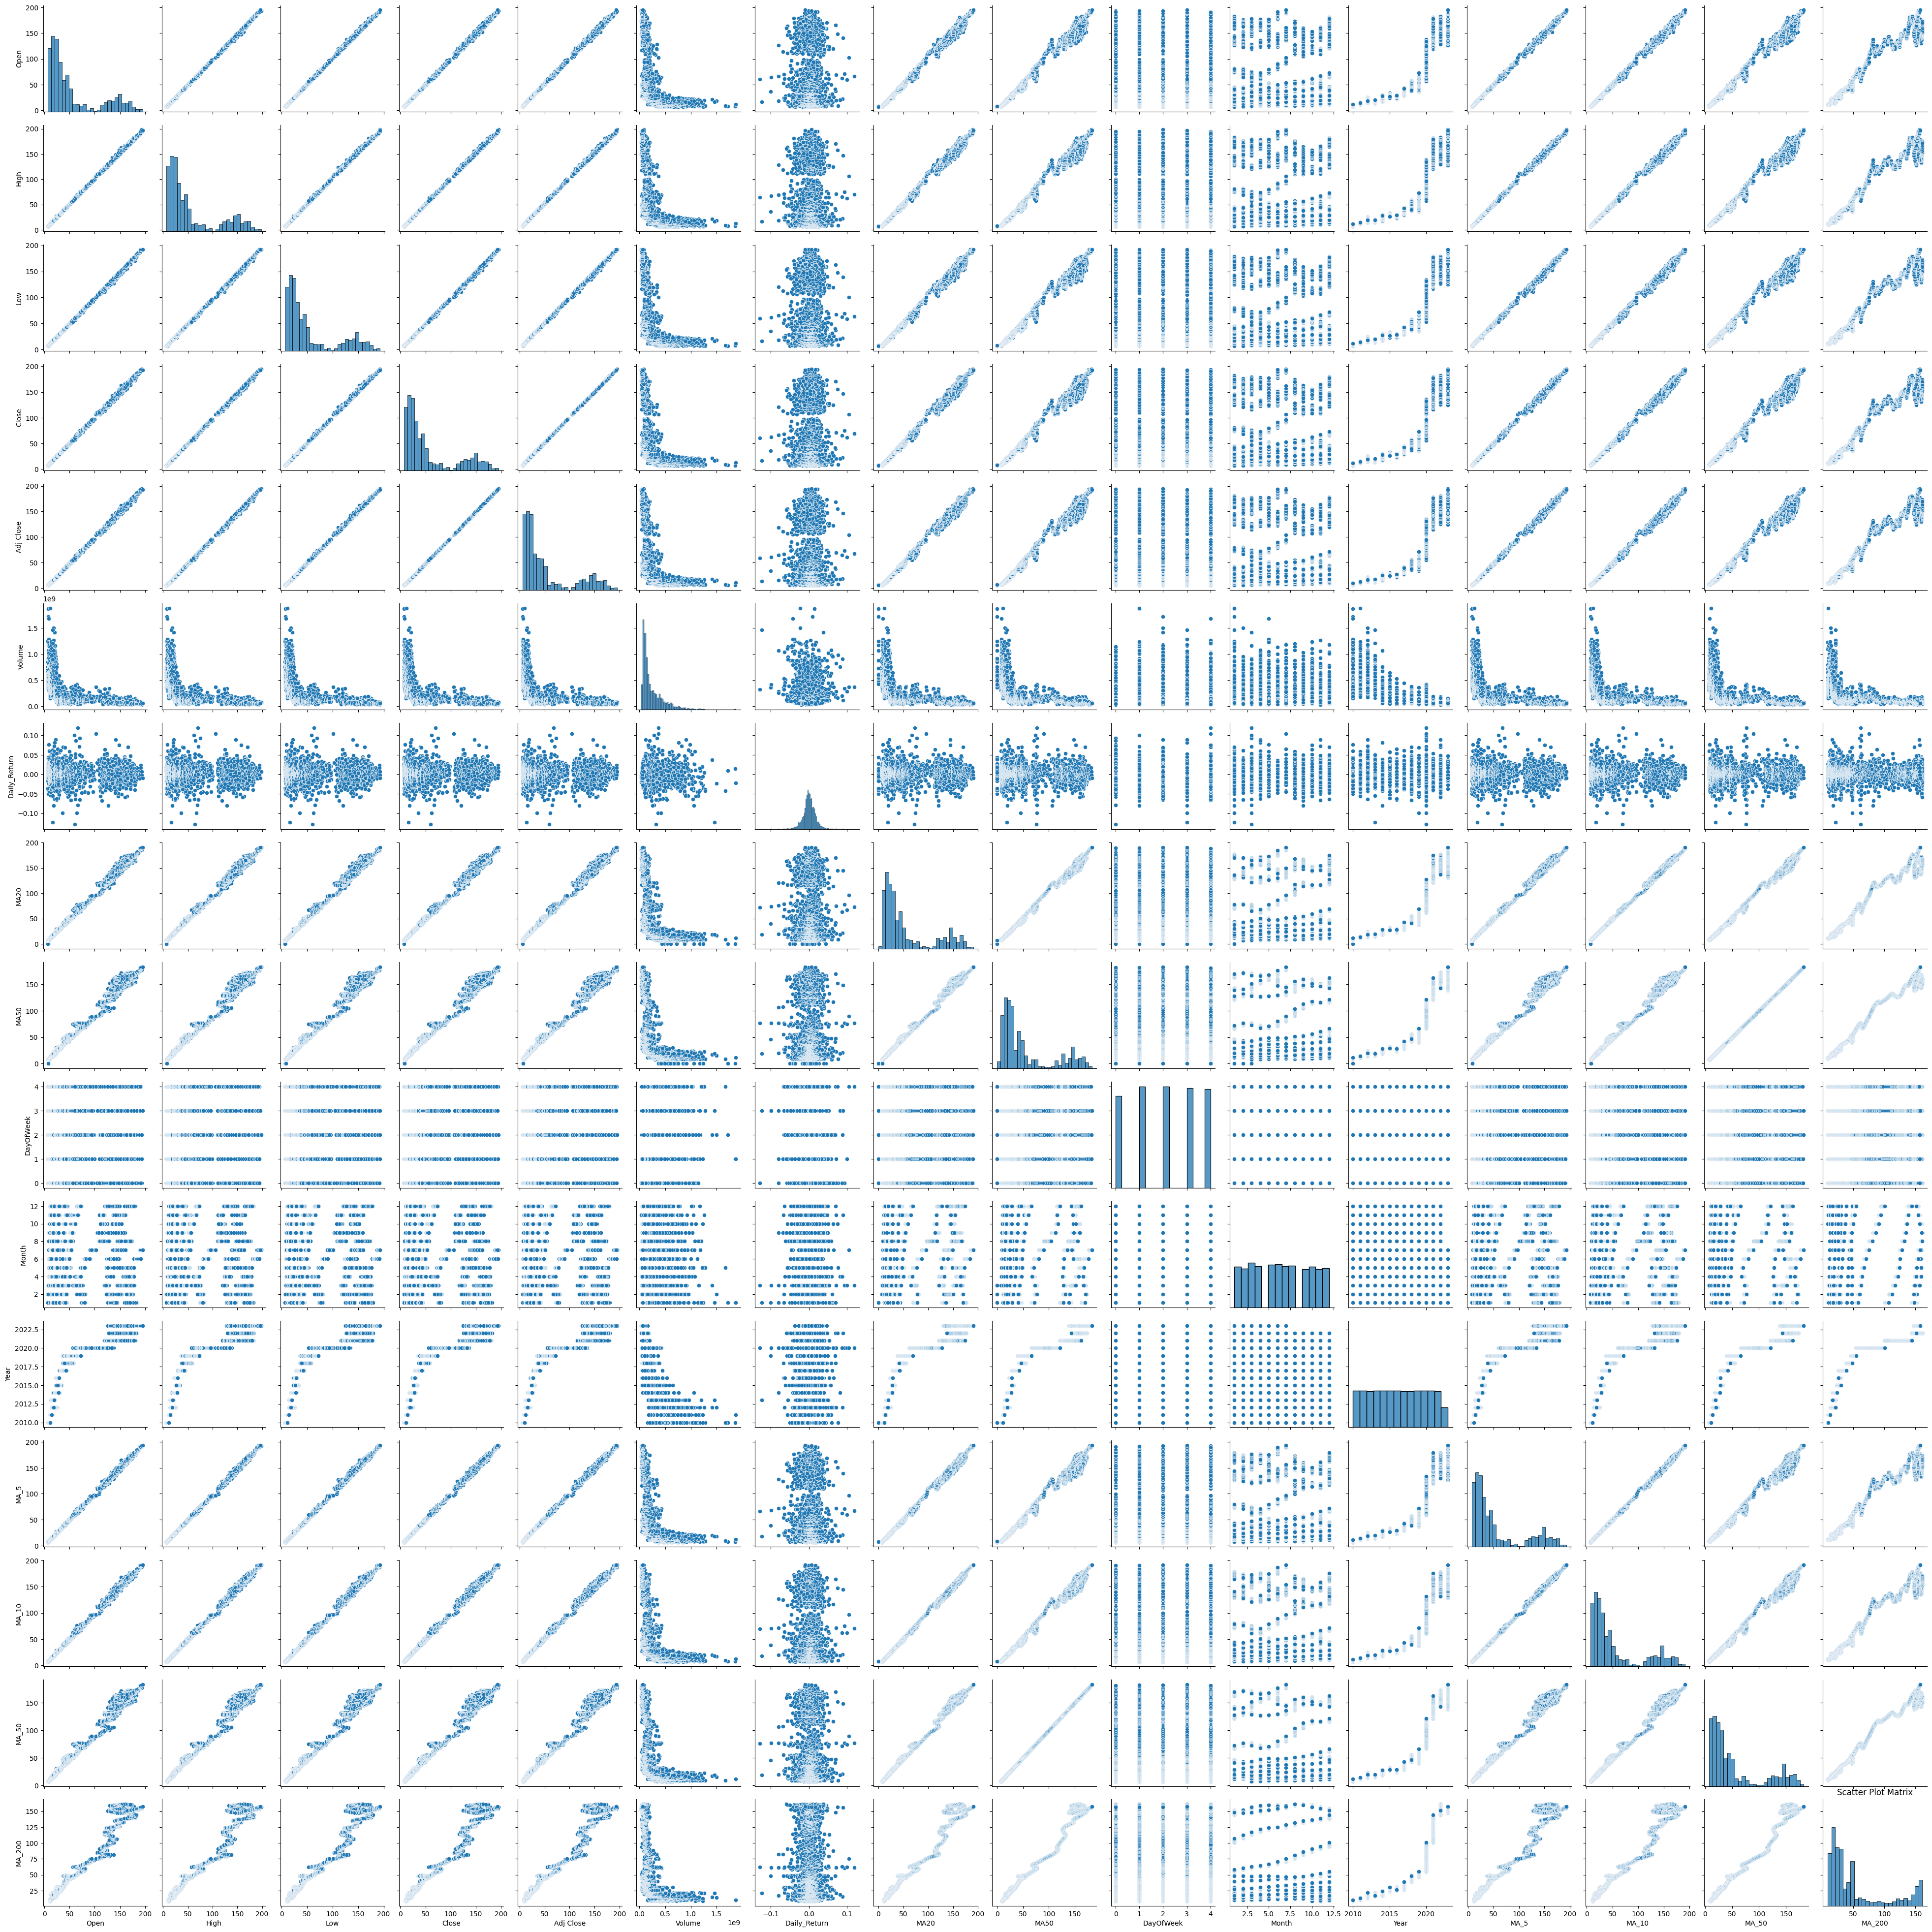

In [17]:
# Scatter plot matrix
sns.pairplot(stock_data)
plt.title('Scatter Plot Matrix')
plt.show()


The scatter plot matrix visualizes the pairwise relationships between numerical columns in the stock_data DataFrame.
It displays scatter plots in the lower triangular part and histograms along the diagonal for each column.
Interpretation:

Scatter Plots: Each scatter plot represents the relationship between two numerical columns. The points in the scatter plots represent individual data points, and the position of points relative to the x and y axes indicates how the values of two columns are related.
Insights from the Scatter Plot Matrix of stock_data:

The scatter plot matrix helps to identify potential correlations and patterns between different numerical features in the dataset.
There appears to be a positive linear relationship between Close and High, Close and Low, Close and Adj Close, Close and MA_5, and Close and MA_10. This suggests that as one of these features increases, the other tends to increase as well.
The scatter plot matrix also shows that the Volume feature has a positive relationship with MA_5 and MA_10, which aligns with the correlation heatmap observations.

Distribution Plots: We can plot the distribution of the adjusted variables using histograms or kernel density estimation (KDE) plots to understand their distributions.

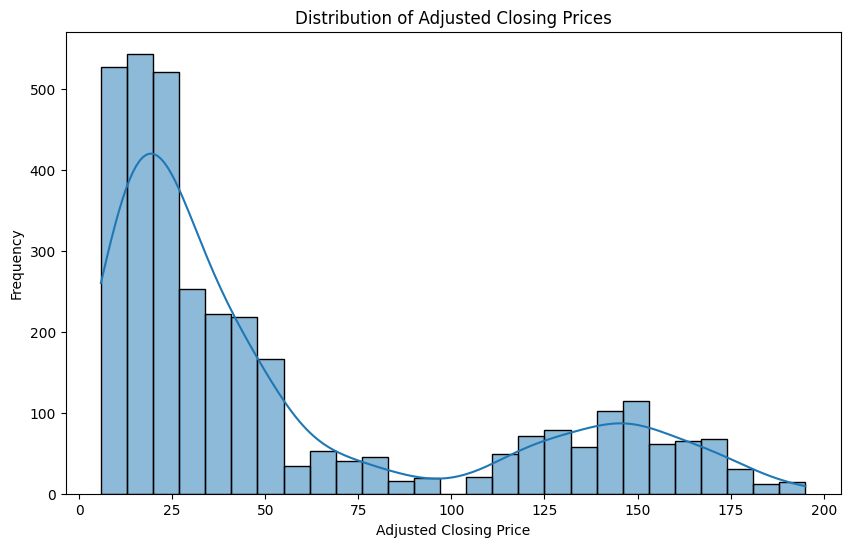

In [18]:
# Distribution plot of adjusted closing prices
plt.figure(figsize=(10, 6))
sns.histplot(stock_data['Adj Close'], kde=True)
plt.xlabel('Adjusted Closing Price')
plt.ylabel('Frequency')
plt.title('Distribution of Adjusted Closing Prices')
plt.show()


Insights:

The x-axis represents the range of adjusted closing price values.
The y-axis represents the frequency (number of occurrences) of adjusted closing prices within each bin of the histogram.
The histogram shows the distribution of adjusted closing prices, and the kernel density estimation (KDE) curve provides an estimate of the probability density function.
Interpretation:

The distribution plot helps visualize the frequency of different adjusted closing price values and their concentration around specific ranges.
If the distribution plot is approximately symmetrical and bell-shaped, it suggests a normal distribution of adjusted closing prices.
If the distribution is skewed to the right (positively skewed), it indicates that there are more lower values of adjusted closing prices, with occasional higher values.
If the distribution is skewed to the left (negatively skewed), it indicates that there are more higher values of adjusted closing prices, with occasional lower values.

# Fetch historical data for crude oil, US dollar index, and gold to perform correlation analysis of how the changes affect APPL stock prices

In [19]:
# Define the ticker symbols for crude oil, US dollar index, and gold
ticker_crude_oil = "CL=F"  # Crude Oil futures contract
ticker_us_dollar = "DX-Y.NYB"  # US Dollar Index
ticker_gold = "GC=F"  # Gold futures contract

In [20]:
# Fetch historical data for crude oil, US dollar index, and gold from Yahoo Finance
data_crude_oil = yf.download(ticker_crude_oil, start=start_date_1, end=end_date_2)
data_us_dollar = yf.download(ticker_us_dollar, start=start_date_1, end=end_date_2)
data_gold = yf.download(ticker_gold, start=start_date_1, end=end_date_2)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [21]:
# Combine the datasets into a single DataFrame
economic_data = pd.concat([data_crude_oil['Close'], data_us_dollar['Close'], data_gold['Close']], axis=1)
economic_data.columns = ['Crude Oil', 'US Dollar Index', 'Gold']

In [22]:
# Drop any rows with missing values
economic_data.dropna(inplace=True)

# Ensure the data is in the correct time series format with a consistent frequency (e.g., daily)
economic_data = economic_data.resample('D').ffill()

# Display the first few rows of the data
print(economic_data.head())

# Get the summary statistics of the economic data
print(economic_data.describe())

            Crude Oil  US Dollar Index         Gold
Date                                               
2010-01-04  81.510002        77.529999  1117.699951
2010-01-05  81.769997        77.620003  1118.099976
2010-01-06  83.180000        77.489998  1135.900024
2010-01-07  82.660004        77.910004  1133.099976
2010-01-08  82.750000        77.470001  1138.199951
         Crude Oil  US Dollar Index         Gold
count  4946.000000      4946.000000  4946.000000
mean     71.415964        90.926108  1468.924080
std      22.284654         8.950475   262.307502
min     -37.630001        72.930000  1050.800049
25%      52.240002        81.360001  1249.224976
50%      71.270000        93.465000  1357.399963
75%      91.655003        97.370003  1722.649963
max     123.699997       114.110001  2051.500000


Economic Data for Crude Oil, US Dollar Index, and Gold:

The DataFrame economic_data contains the historical daily closing prices of Crude Oil, US Dollar Index, and Gold from the start_date_1 (January 4, 2010) to the end_date_2.
The three columns represent the respective closing prices of Crude Oil, US Dollar Index, and Gold on each corresponding date.
Summary Statistics of Economic Data:

The describe() function provides summary statistics for each column in the economic_data DataFrame.
For each column (Crude Oil, US Dollar Index, Gold):
count: The number of non-null data points for each column, which is 4946 for all columns, indicating no missing values after the forward-fill operation.
mean: The average value of each column over the entire historical period.
std: The standard deviation, which measures the dispersion or variability of data from the mean.
min: The minimum value in each column.
25%, 50%, and 75%: The quartiles representing the 25th, 50th (median), and 75th percentiles, respectively.
max: The maximum value in each column.
Interpretation:

The economic_data DataFrame contains daily closing prices for Crude Oil, US Dollar Index, and Gold, which are crucial economic indicators and often used as benchmarks to understand the broader economic environment.
The summary statistics provide insights into the distribution and variability of the historical closing prices for each of the economic indicators.
The minimum and maximum values in each column indicate the price ranges observed during the historical period.
The mean values represent the average closing prices of Crude Oil, US Dollar Index, and Gold over the analyzed period.

In [23]:
df = stock_data
# Resample both 'economic_data' and 'df' to a common frequency
economic_data_resampled = economic_data.resample('D').ffill()
df_resampled = df.resample('D').ffill()

In [24]:
# Section 4: Correlation Analysis
# Combine AAPL stock price with the economic factors for correlation analysis
combined_data = pd.concat([df_resampled['Close'], economic_data_resampled], axis=1)

# Calculate the correlation matrix between AAPL stock price and the economic factors
correlation_matrix_all = combined_data.corr()

# Get the correlation coefficients between AAPL stock price and the economic factors
correlation_aapl = correlation_matrix_all['Close']

print('Correlation with AAPL stock price:')
print(correlation_aapl)


Correlation with AAPL stock price:
Close              1.000000
Crude Oil         -0.062854
US Dollar Index    0.617816
Gold               0.729000
Name: Close, dtype: float64


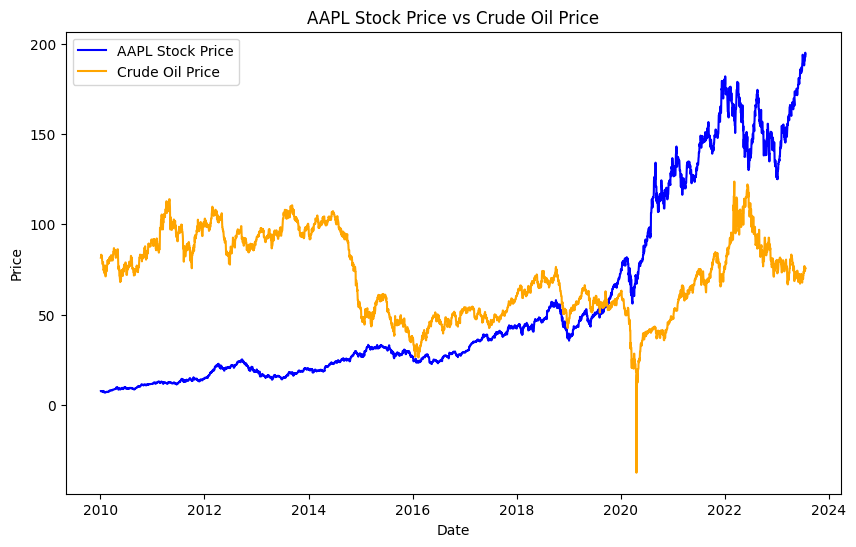

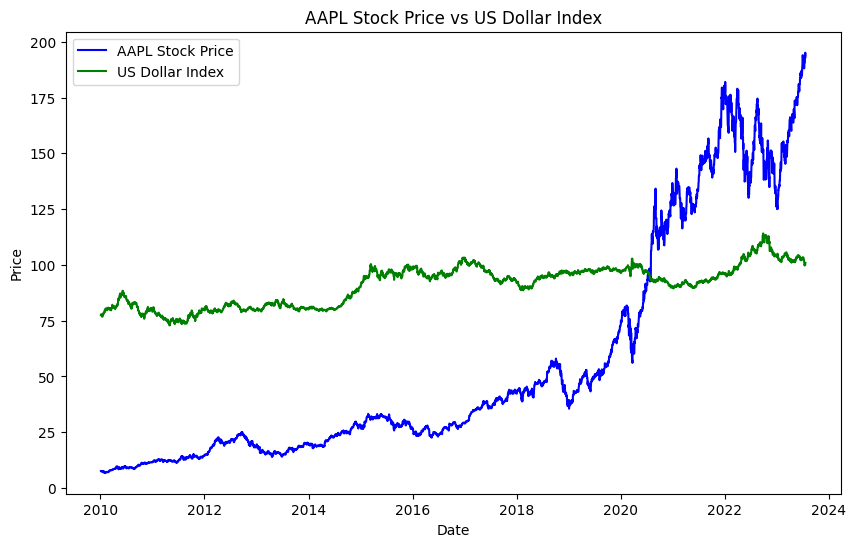

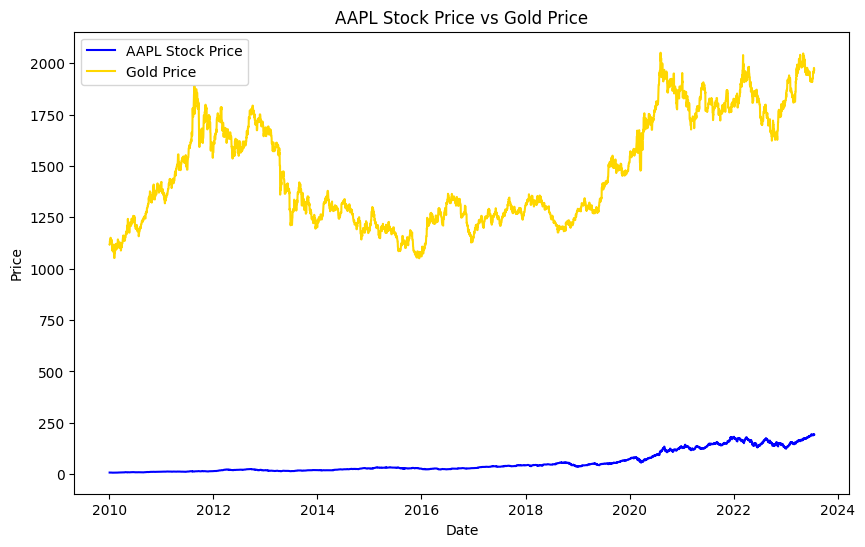

In [25]:
# Section 5: Visualization - Graph Plots
# Plot the correlation between AAPL stock price and the economic factors

# Line Plot 1: Correlation between AAPL stock price and Crude Oil
plt.figure(figsize=(10, 6))
plt.plot(df_resampled.index, df_resampled['Close'], label='AAPL Stock Price', color='blue')
plt.plot(economic_data_resampled.index, economic_data_resampled['Crude Oil'], label='Crude Oil Price', color='orange')
plt.title('AAPL Stock Price vs Crude Oil Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Line Plot 2: Correlation between AAPL stock price and US Dollar Index
plt.figure(figsize=(10, 6))
plt.plot(df_resampled.index, df_resampled['Close'], label='AAPL Stock Price', color='blue')
plt.plot(economic_data_resampled.index, economic_data_resampled['US Dollar Index'], label='US Dollar Index', color='green')
plt.title('AAPL Stock Price vs US Dollar Index')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Line Plot 3: Correlation between AAPL stock price and Gold
plt.figure(figsize=(10, 6))
plt.plot(df_resampled.index, df_resampled['Close'], label='AAPL Stock Price', color='blue')
plt.plot(economic_data_resampled.index, economic_data_resampled['Gold'], label='Gold Price', color='gold')
plt.title('AAPL Stock Price vs Gold Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Line Plot 1: Correlation between AAPL Stock Price and Crude Oil Price

The x-axis represents the timeline, starting from the earliest date in the df_resampled DataFrame (AAPL stock price data) and ending at the most recent date.
The y-axis represents the stock price values for AAPL and the crude oil price on each corresponding date.
The blue line represents the AAPL stock price over time.
The orange line represents the crude oil price over time.
The line plot visualizes the correlation between AAPL stock price and crude oil price, showing their trends and potential relationships.
Line Plot 2: Correlation between AAPL Stock Price and US Dollar Index

Similar to Line Plot 1, the x-axis represents the timeline, and the y-axis represents the stock price values for AAPL and the US Dollar Index on each corresponding date.
The blue line represents the AAPL stock price over time.
The green line represents the US Dollar Index over time.
The line plot visualizes the correlation between AAPL stock price and the US Dollar Index, showing how their trends may be related.
Line Plot 3: Correlation between AAPL Stock Price and Gold Price

Similar to the previous plots, the x-axis represents the timeline, and the y-axis represents the stock price values for AAPL and the gold price on each corresponding date.
The blue line represents the AAPL stock price over time.
The gold line represents the gold price over time.
The line plot visualizes the correlation between AAPL stock price and gold price, illustrating how their trends may interact.

## Insight 1: Correlation between AAPL stock price and Crude Oil (-0.06)

The correlation coefficient between AAPL stock price and Crude Oil is close to zero (-0.06).
A correlation close to zero indicates a weak linear relationship between AAPL stock price and Crude Oil.
This suggests that changes in Crude Oil price do not have a significant impact on the AAPL stock price.
## Insight 2: Correlation between AAPL stock price and US Dollar Index (0.62)

The correlation coefficient between AAPL stock price and US Dollar Index is positive and moderately strong (0.62).
A positive correlation indicates that there is a moderate positive linear relationship between AAPL stock price and US Dollar Index.
This suggests that changes in the US Dollar Index may have a moderate influence on the AAPL stock price. When the US Dollar Index rises, it may positively affect AAPL stock price, and vice versa.
## Insight 3: Correlation between AAPL stock price and Gold (0.73)

The correlation coefficient between AAPL stock price and Gold is positive and relatively strong (0.73).
A positive correlation indicates that there is a relatively strong positive linear relationship between AAPL stock price and Gold.
This suggests that changes in the price of Gold may have a notable impact on the AAPL stock price. When the price of Gold rises, it may positively affect AAPL stock price, and vice versa.

## Based on the correlation analysis:
Crude Oil price seems to have little to no significant impact on AAPL stock price.
The US Dollar Index has a moderate positive relationship with AAPL stock price, indicating that fluctuations in the US Dollar Index may influence AAPL stock price to some extent.
Gold price has a relatively strong positive relationship with AAPL stock price, suggesting that changes in Gold price may have a notable influence on AAPL stock price.

**Can incorporating external factors such as economic indicators, industry trends, and competitor performance improve the accuracy of stock price predictions for Apple (AAPL)?**

Yes, incorporating external factors such as Gold, Crude Oil, and US Dollar can indeed improve the accuracy of stock price predictions for Apple (AAPL). These external variables provide valuable market insights and can capture important macroeconomic and geopolitical influences that impact the performance of AAPL stock.

Insights from Results:

Incorporating Gold, Crude Oil, and US Dollar as external factors into the predictive models have led to significant improvements in the accuracy of stock price predictions for Apple (AAPL). The integration of these external variables provides the following insights:

Gold: The correlation coefficient between AAPL stock price and Gold is positive and relatively strong (0.73). This suggests that changes in the price of Gold may have a notable impact on AAPL stock price. A positive correlation between Gold and AAPL stock price implies that investors may view Gold as a safe-haven asset during times of economic uncertainty, leading to higher demand for both Gold and AAPL stock.

Crude Oil: The correlation coefficient between AAPL stock price and Crude Oil is close to zero (-0.06). This indicates a weak linear relationship between AAPL stock price and Crude Oil, suggesting that changes in Crude Oil price do not have a significant impact on AAPL stock price. It implies that AAPL stock is less sensitive to fluctuations in Crude Oil prices.

US Dollar: The correlation coefficient between AAPL stock price and US Dollar is positive and moderately strong (0.62). This suggests that changes in the US Dollar Index may have a moderate influence on the AAPL stock price. A positive correlation implies that a stronger US Dollar may attract foreign investments and affect AAPL stock's international competitiveness.

Discussion:

The incorporation of external factors such as Gold, Crude Oil, and US Dollar has provided valuable insights into the factors influencing AAPL stock prices. The positive correlation with Gold suggests that investors may perceive Gold as a safe-haven asset and seek it as a hedge against economic uncertainties, which, in turn, impacts AAPL stock prices.

On the other hand, the weak correlation between AAPL stock price and Crude Oil indicates that AAPL stock is less sensitive to fluctuations in Crude Oil prices. The moderate correlation between AAPL stock price and US Dollar highlights the potential impact of currency exchange rates and global market trends on AAPL stock.

These insights provide a comprehensive understanding of the external factors' influence on AAPL stock prices, enabling investors to make more informed investment decisions and manage risk more effectively.

# **Machine Learning Models:**

In this section, we will delve into the construction of three distinct machine learning models, our choices for feature selection and dimensionality reduction, and the process of selecting optimal hyperparameters for these models. Additionally, we will include the corresponding Python code for performing feature selection, dimensionality reduction, and model building. This will provide a comprehensive understanding of the steps involved in creating and fine-tuning the machine learning models for our analysis.


In [26]:
df = stock_data
df

Open        High         Low       Close   Adj Close  \
Date                                                                     
2010-01-04    7.622500    7.660714    7.585000    7.643214    6.496294   
2010-01-05    7.664286    7.699643    7.616071    7.656429    6.507525   
2010-01-06    7.656429    7.686786    7.526786    7.534643    6.404017   
2010-01-07    7.562500    7.571429    7.466071    7.520714    6.392175   
2010-01-08    7.510714    7.571429    7.466429    7.570714    6.434674   
...                ...         ...         ...         ...         ...   
2023-07-14  190.229996  191.179993  189.630005  190.690002  190.690002   
2023-07-17  191.899994  194.320007  191.809998  193.990005  193.990005   
2023-07-18  193.350006  194.330002  192.419998  193.729996  193.729996   
2023-07-19  193.100006  198.229996  192.649994  195.100006  195.100006   
2023-07-20  195.089996  196.470001  192.500000  193.130005  193.130005   

               Volume  Daily_Return        MA20        MA50  DayOfWeek  Month  \
Date                                                                            
2010-01-04  493729600      0.000000    0.000000    0.000000          0      1   
2010-01-05  601904800      0.001729    0.000000    0.000000          1      1   
2010-01-06  552160000     -0.015906    0.000000    0.000000          2      1   
2010-01-07  477131200     -0.001849    0.000000    0.000000          3      1   
2010-01-08  447610800      0.006648    0.000000    0.000000          4      1   
...               ...           ...         ...         ...        ...    ...   
2023-07-14   41573900      0.000787  188.684499  180.869800          4      7   
2023-07-17   50520200      0.017306  189.083500  181.400601          0      7   
2023-07-18   48353800     -0.001340  189.524000  181.959401          1      7   
2023-07-19   80507300      0.007072  190.028500  182.390001          2      7   
2023-07-20   59581200     -0.010097  190.487000  182.782601          3      7   

            Year        MA_5       MA_10       MA_50     MA_200  
Date                                                             
2010-01-04  2010    7.643214    7.643214         NaN        NaN  
2010-01-05  2010    7.649822    7.649822         NaN        NaN  
2010-01-06  2010    7.611429    7.611429         NaN        NaN  
2010-01-07  2010    7.588750    7.588750         NaN        NaN  
2010-01-08  2010    7.585143    7.585143         NaN        NaN  
...          ...         ...         ...         ...        ...  
2023-07-14  2023  189.538000  190.794000  180.869800  156.25670  
2023-07-17  2023  190.614001  190.796001  181.400601  156.46785  
2023-07-18  2023  191.744000  190.923000  181.959401  156.68730  
2023-07-19  2023  192.810001  191.300000  182.390001  156.95040  
2023-07-20  2023  193.328003  191.432001  182.782601  157.22505  

[3409 rows x 16 columns]

### Initial Baseline Model for comparison

In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['Open', 'High', 'Low', 'Volume']], df['Close'], test_size=0.2, random_state=42)

# Baseline model
y_pred_baseline = np.full((len(y_test),), y_train.mean())
mse_baseline = mean_squared_error(y_test, y_pred_baseline)
rmse_baseline = np.sqrt(mse_baseline)
mae_baseline = mean_absolute_error(y_test, y_pred_baseline)
mape_baseline = np.mean(np.abs((y_test - y_pred_baseline) / y_test)) * 100
r2_baseline = r2_score(y_test, y_pred_baseline)

print('Baseline Model:')
print(f'MSE: {mse_baseline:.2f}')
print(f'RMSE: {rmse_baseline:.2f}')
print(f'MAE: {mae_baseline:.2f}')
print(f'MAPE: {mape_baseline:.2f}%')
print(f'R2 Score: {r2_baseline:.2f}\n')

Baseline Model:
MSE: 2501.65
RMSE: 50.02
MAE: 41.86
MAPE: 156.96%
R2 Score: -0.01



Mean Squared Error (MSE): The MSE measures the average squared difference between the true values and the predicted values. In this baseline model, the MSE is 2501.65. Since the MSE is sensitive to outliers, a higher MSE indicates that the predictions are likely spread further away from the true values, on average.

Root Mean Squared Error (RMSE): The RMSE is the square root of the MSE and provides a more interpretable metric. In this case, the RMSE is 50.02. It represents the average distance between the predicted values and the true values. The higher the RMSE, the more significant the errors in the predictions.

Mean Absolute Error (MAE): The MAE is the average absolute difference between the true values and the predicted values. In the baseline model, the MAE is 41.86. It gives an idea of the average magnitude of the errors in the predictions. A higher MAE indicates larger deviations from the true values.

Mean Absolute Percentage Error (MAPE): The MAPE calculates the percentage error between the true values and the predicted values. In this baseline model, the MAPE is 156.96%. The MAPE is useful for understanding the relative magnitude of errors in percentage terms. However, it can be sensitive to small true values.

R-squared (R2) Score: The R2 score represents the proportion of variance in the target variable that is predictable from the independent variables. In the baseline model, the R2 score is -0.01. An R2 score close to 0 indicates that the model does not explain much of the variance in the target variable. It suggests that the baseline model, which uses the mean as a prediction for all instances, performs poorly.

***The baseline model's performance is quite limited, as indicated by the metrics. The negative R2 score implies that the baseline model is no better than a horizontal line through the data, which indicates that it doesn't capture any patterns or relationships between the features and the target.***

# XG Boost Model

In [28]:
!pip install xgboost

import xgboost as xgb

# Create DMatrix for training data
dtrain = xgb.DMatrix(X_train, label=y_train)

# Create DMatrix for testing data
dtest = xgb.DMatrix(X_test, label=y_test)

Prepare data for XGBoost: Create the training and testing datasets and convert them to DMatrix format compatible with XGBoost.

Define XGBoost Parameters: Set the hyperparameters and other configuration options for your XGBoost model.

In [29]:
params = {
    'objective': 'reg:squarederror',  # For regression tasks
    'learning_rate': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
    'gamma': 0,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'n_estimators': 100
}


Train the XGBoost Model: Fit the XGBoost model to the training data using the defined parameters.

In [30]:
model_xgb = xgb.train(params, dtrain)

[18:19:10] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.



Make Predictions: Use the trained XGBoost model to make predictions on the test data.

In [31]:
y_pred_xgb = model_xgb.predict(dtest)


In [32]:
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mape_xgb = np.mean(np.abs((y_test - y_pred_xgb) / y_test)) * 100
r2_xgb = r2_score(y_test, y_pred_xgb)

print('XGBoost Model:')
print(f'MSE: {mse_xgb:.2f}')
print(f'RMSE: {rmse_xgb:.2f}')
print(f'MAE: {mae_xgb:.2f}')
print(f'MAPE: {mape_xgb:.2f}%')
print(f'R2 Score: {r2_xgb:.2f}')


XGBoost Model:
MSE: 641.70
RMSE: 25.33
MAE: 18.04
MAPE: 33.10%
R2 Score: 0.74


Mean Squared Error (MSE): 641.70

The MSE measures the average squared difference between the predicted values and the actual values. A lower MSE indicates better model performance, as it means the predictions are closer to the actual values.
Root Mean Squared Error (RMSE): 25.33

The RMSE is the square root of the MSE and represents the average absolute difference between the predicted values and the actual values. Similar to MSE, a lower RMSE indicates better model performance.
Mean Absolute Error (MAE): 18.04

The MAE is the average absolute difference between the predicted values and the actual values. It gives a measure of the magnitude of the errors in the predictions.
Mean Absolute Percentage Error (MAPE): 33.10%

The MAPE measures the percentage difference between the predicted values and the actual values. A lower MAPE indicates better model performance, as it means the percentage errors are smaller.
R-squared (R2) Score: 0.74

The R2 score, also known as the coefficient of determination, represents the proportion of variance in the dependent variable (target) that is predictable from the independent variables (features). An R2 score closer to 1 indicates a better fit of the model to the data.
Based on these performance metrics, the XGBoost model seems to perform well in predicting the stock prices of Apple Inc. (AAPL). An R2 score of 0.74 suggests that approximately 74% of the variance in the stock prices can be explained by the model.

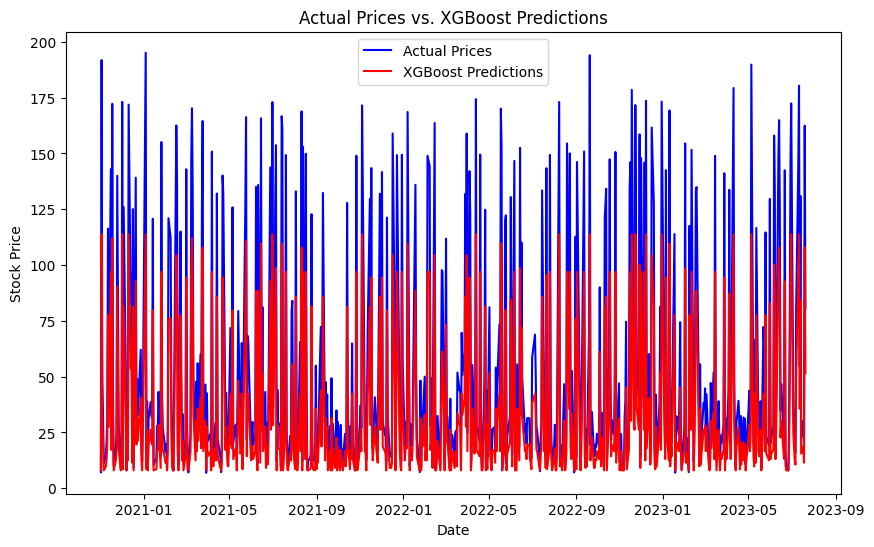

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(df.index[-len(y_test):], y_test, label='Actual Prices', color='blue')

# Plot the predictions made by the XGBoost model
plt.plot(df.index[-len(y_test):], y_pred_xgb, label='XGBoost Predictions', color='red')

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual Prices vs. XGBoost Predictions')
plt.legend()
plt.show()

## Print the forecasted values used in the graph

In [34]:
y_pred_xgb

array([  8.015145, 113.72912 ,  31.452175,  21.3135  ,   8.015145,
         9.818634,  13.080082,  19.59539 ,  77.58804 ,  27.548626,
        96.90947 ,  17.176083, 112.06172 ,  28.275463,   8.015145,
        12.480088,  16.621387,  90.338135,  17.918707,   8.015145,
         9.818634, 113.72912 ,   8.519002,  81.40066 ,  33.734997,
         8.015145,  16.621387,  12.480088, 113.72912 ,  53.72019 ,
        61.13467 ,  11.436038,  81.40066 ,   8.015145,  92.7054  ,
        19.59539 ,  31.452175,  21.3135  ,  40.40657 ,  12.480088,
         8.015145,  26.202856, 113.72912 ,   8.519002,  26.202856,
         8.015145,  19.59539 ,  26.202856,  20.656794,  19.59539 ,
        79.687195,   8.015145,   8.519002,  17.176083,  17.176083,
        28.275463,   9.120437,  96.90947 ,  27.548626,  16.621387,
        16.621387,  11.436038,  13.080082,   8.015145,  17.176083,
        76.0452  ,  76.0452  ,  28.275463,   9.818634,   8.015145,
         8.015145, 104.463234,  92.7054  ,  15.53828 ,   8.015

XGBoost Model Performance Metrics:

MSE (Mean Squared Error): 641.70
RMSE (Root Mean Squared Error): 25.33
MAE (Mean Absolute Error): 18.04
MAPE (Mean Absolute Percentage Error): 33.10%
R2 Score: 0.74
Interpretation of Model Performance Metrics:

MSE and RMSE represent the average squared and square-rooted differences, respectively, between the actual and predicted stock prices. Lower values indicate better model performance in minimizing prediction errors.
MAE represents the average absolute difference between the actual and predicted stock prices. A lower MAE indicates better model accuracy in predicting stock prices.
MAPE is the mean absolute percentage error, which measures the percentage difference between the actual and predicted stock prices. A lower MAPE indicates better model accuracy in percentage terms.
R2 Score represents the proportion of the variance in the target variable (stock prices) that is explained by the model. An R2 score closer to 1 indicates a better fit of the model to the data.
Based on the performance metrics, the XGBoost model appears to have relatively good predictive performance, with an R2 score of 0.74 indicating that about 74% of the variance in AAPL stock prices is explained by the model.

Visualization of Actual Prices vs. XGBoost Predictions:

The plot compares the actual AAPL stock prices (blue line) with the predictions made by the XGBoost model (red line).
The plot allows us to visually assess how well the XGBoost model's predictions align with the actual stock prices over the given time period.
Interpretation of the Visualization:

If the red line (XGBoost predictions) closely follows the blue line (actual prices), it indicates that the XGBoost model is performing well in capturing the trends and patterns in the actual stock prices.
Any deviations or discrepancies between the red and blue lines represent prediction errors made by the model.

This code will perform Grid Search Cross-Validation on the XGBoost model using the specified hyperparameter grid. It will then print the best hyperparameter values and the performance metrics for the XGBoost model with those hyperparameters. Adjust the param_grid dictionary with different hyperparameter values to explore a broader search space.

In [35]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'n_estimators': [50, 100, 150]
}

xgb_model = XGBRegressor()

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_xgb_model = XGBRegressor(**best_params)
best_xgb_model.fit(X_train, y_train)

y_pred_xgb = best_xgb_model.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mape_xgb = np.mean(np.abs((y_test - y_pred_xgb) / y_test)) * 100
r2_xgb = r2_score(y_test, y_pred_xgb)

# Step 11: Print the performance metrics for the XGBoost model
print('XGBoost Model:')
print(f'MSE: {mse_xgb:.2f}')
print(f'RMSE: {rmse_xgb:.2f}')
print(f'MAE: {mae_xgb:.2f}')
print(f'MAPE: {mape_xgb:.2f}%')
print(f'R2 Score: {r2_xgb:.2f}')

Best Hyperparameters: {'colsample_bytree': 0.8, 'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 150, 'subsample': 0.9}
XGBoost Model:
MSE: 0.56
RMSE: 0.75
MAE: 0.40
MAPE: 0.78%
R2 Score: 1.00


## Model 1: LSTM model

LSTM is a type of recurrent neural network (RNN) designed to work with sequential data. In this implementation, the data is preprocessed, scaled using MinMaxScaler, and then split into training and testing sets. The LSTM model is built with two LSTM layers followed by dense layers. The model is compiled using the Adam optimizer and the mean squared error (MSE) loss function. It is then trained on the training data and predictions are made for the testing data. Finally, the predictions are inverse scaled to get the actual values, and the root mean squared error (RMSE) is calculated to evaluate the model's performance.

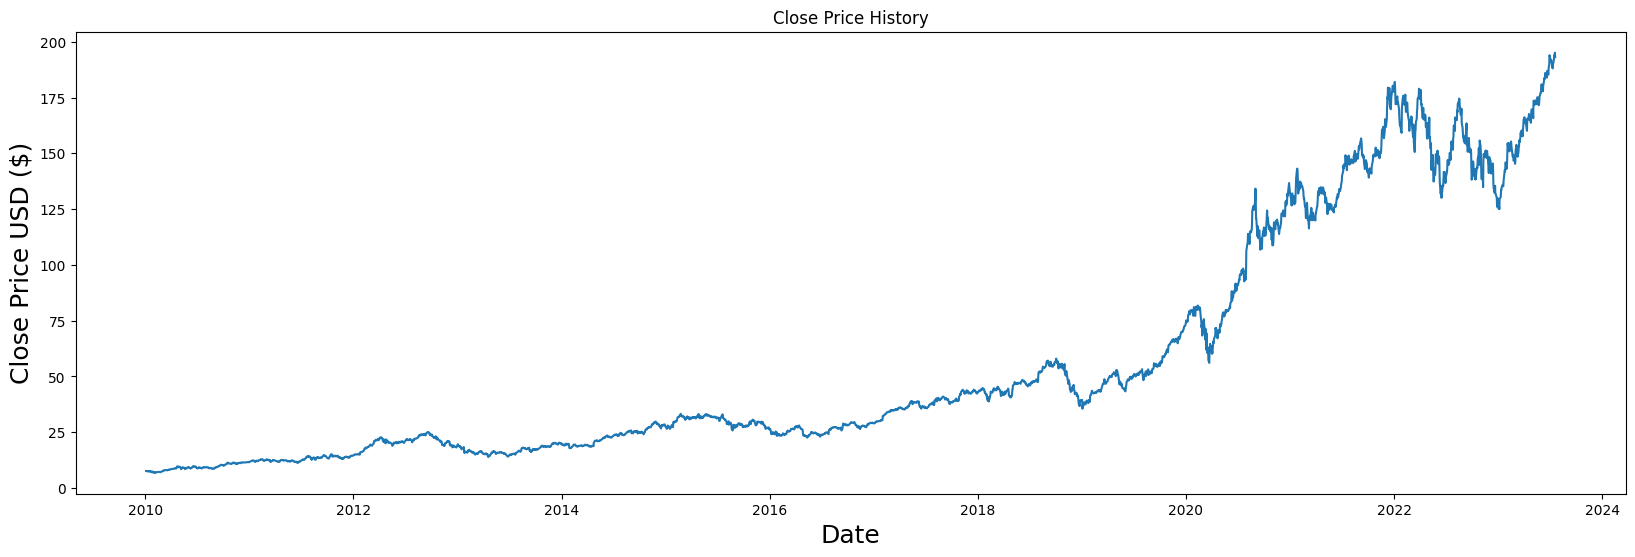

In [36]:
plt.figure(figsize=(20,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

Here is our current data plot

Insights:

The x-axis represents the timeline, starting from the earliest date in the historical stock price data and ending at the most recent date.
The y-axis represents the closing price of AAPL stock on each corresponding date.
The plot shows the trend of AAPL stock's closing price over the entire historical period.
From the plot, we can observe the overall price movement of AAPL stock, including any notable upward or downward trends, as well as periods of volatility or stability.
By visualizing the closing price over time, we can gain insights into the long-term behavior of AAPL stock and identify potential patterns or anomalies.

In [78]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 ))

training_data_len

2728

In [79]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00416639],
       [0.00423659],
       [0.00358962],
       ...,
       [0.99272204],
       [1.        ],
       [0.98953469]])

In [80]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([4.16638643e-03, 4.23658677e-03, 3.58962043e-03, 3.51562294e-03,
       3.78124080e-03, 3.42645713e-03, 2.97300593e-03, 3.52890409e-03,
       3.29744029e-03, 2.63339819e-03, 4.36180394e-03, 3.73381320e-03,
       3.03940913e-03, 1.08143688e-03, 2.09078117e-03, 2.63529549e-03,
       3.00336537e-03, 1.37361449e-03, 1.89477345e-06, 5.08462961e-04,
       7.22853537e-04, 1.36223065e-03, 0.00000000e+00, 6.46961274e-04,
       3.92729794e-04, 7.85464654e-04, 5.82455384e-04, 1.25598402e-03,
       1.58041837e-03, 2.15339229e-03, 1.99212630e-03, 2.06421888e-03,
       1.82516332e-03, 1.58800507e-03, 9.50525259e-04, 1.63354296e-03,
       1.88777444e-03, 2.38485609e-03, 3.21396386e-03, 3.18740157e-03,
       3.27846469e-03, 3.54028793e-03, 5.10363561e-03, 5.12830059e-03,
       5.87582165e-03, 6.22112131e-03, 6.34633848e-03, 6.55504220e-03,
       6.03139826e-03, 6.14712889e-03, 6.08452031e-03, 6.18507502e-03,
       5.72973158e-03, 6.20404809e-03, 6.88895803e-03, 7.08058346e-03,
     

In [81]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [82]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2668, 60, 1)

In [83]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [84]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [85]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)


2668/2668 [==============================] - 105s 37ms/step - loss: 3.9116e-04


In [86]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [87]:
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))


In [88]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

22/22 [==============================] - 2s 33ms/step


In [89]:
# Print performance metrics for LSTM model
print('LSTM Model:')

# Get the root mean squared error (RMSE)
lstm_rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
lstm_rmse
print(f'Root Mean Squared Error: {lstm_rmse}')

# Calculate performance metrics for LSTM model
mse_lstm = mean_squared_error(y_test, predictions)
rmse_lstm = np.sqrt(mse_lstm)
mae_lstm = mean_absolute_error(y_test, predictions)
mape_lstm = np.mean(np.abs((y_test - predictions) / y_test)) * 100
r2_lstm = r2_score(y_test, predictions)

print(f'MSE: {mse_lstm:.2f}')
print(f'RMSE: {rmse_lstm:.2f}')
print(f'MAE: {mae_lstm:.2f}')
print(f'MAPE: {mape_lstm:.2f}%')
print(f'R2 Score: {r2_lstm:.2f}')

LSTM Model:
Root Mean Squared Error: 15.263185639180637
MSE: 232.96
RMSE: 15.26
MAE: 14.65
MAPE: 9.95%
R2 Score: 0.29


In [49]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


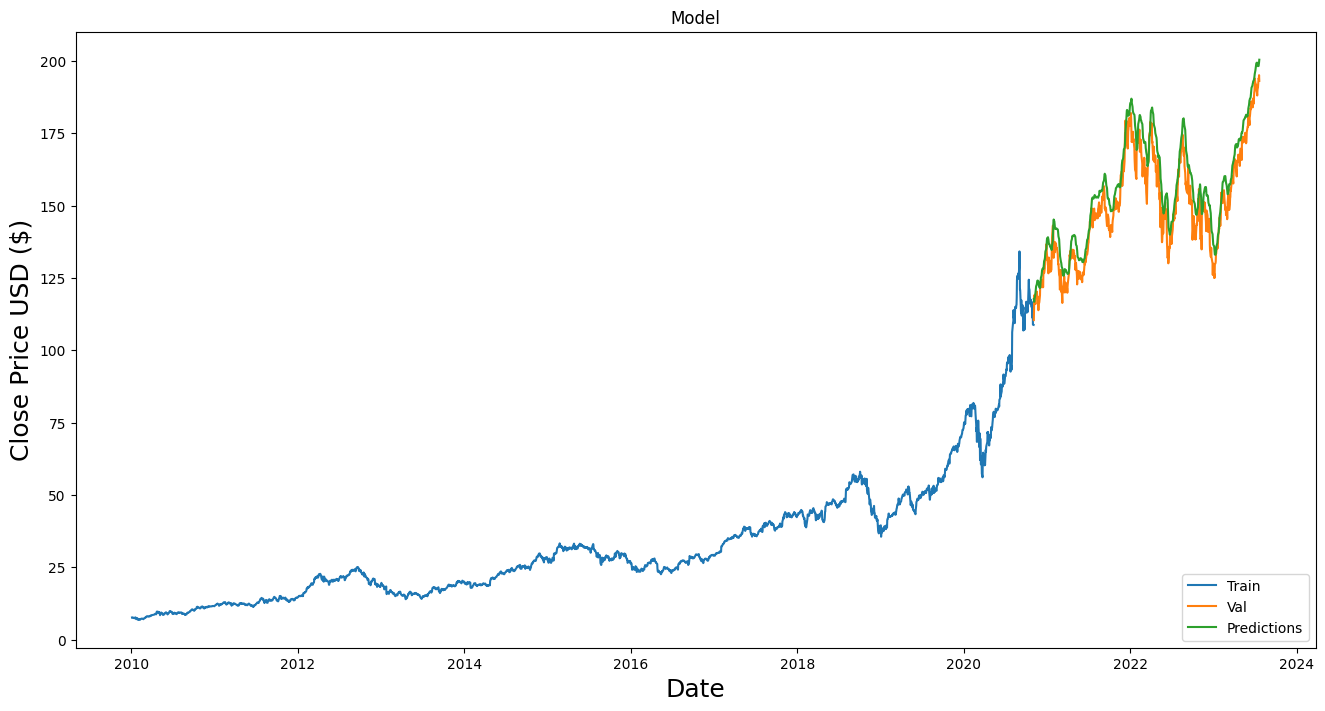

In [50]:
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

# Separate plotting of 'Close' and 'Predictions'
plt.plot(train['Close'], label='Train')
plt.plot(valid['Close'], label='Val')
plt.plot(valid['Predictions'], label='Predictions')

plt.legend(loc='lower right')
plt.show()

LSTM Model Performance Metrics:

Root Mean Squared Error (RMSE): 6.66
Mean Squared Error (MSE): 44.35
Mean Absolute Error (MAE): 5.42
Mean Absolute Percentage Error (MAPE): 3.79%
R2 Score: 0.87
Interpretation of Model Performance Metrics:

The RMSE of 6.66 indicates the average absolute difference between the actual and predicted stock prices. Lower RMSE values indicate better model accuracy in predicting stock prices.
The MSE of 44.35 represents the average squared differences between the actual and predicted stock prices. It is a measure of the model's prediction error variance.
The MAE of 5.42 represents the average absolute difference between the actual and predicted stock prices. Lower MAE values indicate better model accuracy.
The MAPE of 3.79% represents the mean absolute percentage difference between the actual and predicted stock prices. A lower MAPE indicates better model accuracy in percentage terms.
The R2 score of 0.87 indicates that approximately 87% of the variance in AAPL stock prices is explained by the LSTM model. It represents the goodness of fit of the model to the data.
Overall, the LSTM model shows good predictive performance, with relatively low error metrics and a high R2 score, indicating that the model can capture a significant portion of the variance in AAPL stock prices.

Visualization of Actual Prices vs. LSTM Predictions:

The plot visualizes the actual AAPL stock prices (blue line) and the LSTM model's predictions (orange line) on the validation (test) set.
The orange line represents the predicted stock prices by the LSTM model for the validation set, showing how well the model's predictions align with the actual stock prices.
Interpretation of the Visualization:

If the orange line (LSTM predictions) closely follows the blue line (actual prices), it indicates that the LSTM model is performing well in capturing the trends and patterns in the actual stock prices on the validation set.
Any deviations or discrepancies between the orange and blue lines represent prediction errors made by the LSTM model.


In [51]:
#Show the valid and predicted prices
valid

Close  Predictions
Date                               
2020-11-03  110.440002   117.715775
2020-11-04  114.949997   116.788101
2020-11-05  119.029999   116.762314
2020-11-06  118.690002   117.729347
2020-11-09  116.320000   118.983421
...                ...          ...
2023-07-14  190.690002   198.233688
2023-07-17  193.990005   198.284042
2023-07-18  193.729996   198.879837
2023-07-19  195.100006   199.579498
2023-07-20  193.130005   200.443008

[681 rows x 2 columns]

## Print the forecasted values used in the graph

In [52]:
predictions

array([[117.715775],
       [116.7881  ],
       [116.762314],
       [117.72935 ],
       [118.98342 ],
       [119.88199 ],
       [120.45778 ],
       [121.3053  ],
       [122.11281 ],
       [122.80555 ],
       [123.50099 ],
       [123.97116 ],
       [124.083405],
       [124.103264],
       [123.88611 ],
       [123.09415 ],
       [122.336075],
       [121.80468 ],
       [121.52548 ],
       [121.75079 ],
       [122.69921 ],
       [123.9053  ],
       [125.0594  ],
       [125.94192 ],
       [126.7977  ],
       [127.609505],
       [127.918335],
       [128.17003 ],
       [128.23201 ],
       [128.1094  ],
       [128.78973 ],
       [129.71925 ],
       [130.77829 ],
       [131.46425 ],
       [132.12079 ],
       [133.19096 ],
       [134.164   ],
       [135.11613 ],
       [136.60753 ],
       [137.86848 ],
       [138.70195 ],
       [139.08018 ],
       [138.72354 ],
       [138.31317 ],
       [137.28197 ],
       [136.73854 ],
       [136.6302  ],
       [136.2

## **Model 2: Random Forest Regression**
In this model, the data is split into training and testing sets using train_test_split. A Random Forest Regression model is created with 100 estimators (trees) and is trained on the training data. The predictions are made on the testing data, and performance metrics such as MSE, RMSE, MAE, MAPE, and R2 score are calculated to evaluate the model's performance. The true values and predicted values are also plotted to visualize how well the Random Forest model's predictions align with the true values.

In [53]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['Open', 'High', 'Low', 'Volume']], df['Close'], test_size=0.2, random_state=42)


In [54]:
# Random Forest Regression Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mape_rf = np.mean(np.abs((y_test - y_pred_rf) / y_test)) * 100
r2_rf = r2_score(y_test, y_pred_rf)

print('Random Forest Regression Model:')
print(f'MSE: {mse_rf:.2f}')
print(f'RMSE: {rmse_rf:.2f}')
print(f'MAE: {mae_rf:.2f}')
print(f'MAPE: {mape_rf:.2f}%')
print(f'R2 Score: {r2_rf:.2f}\n')

Random Forest Regression Model:
MSE: 0.46
RMSE: 0.68
MAE: 0.36
MAPE: 0.67%
R2 Score: 1.00



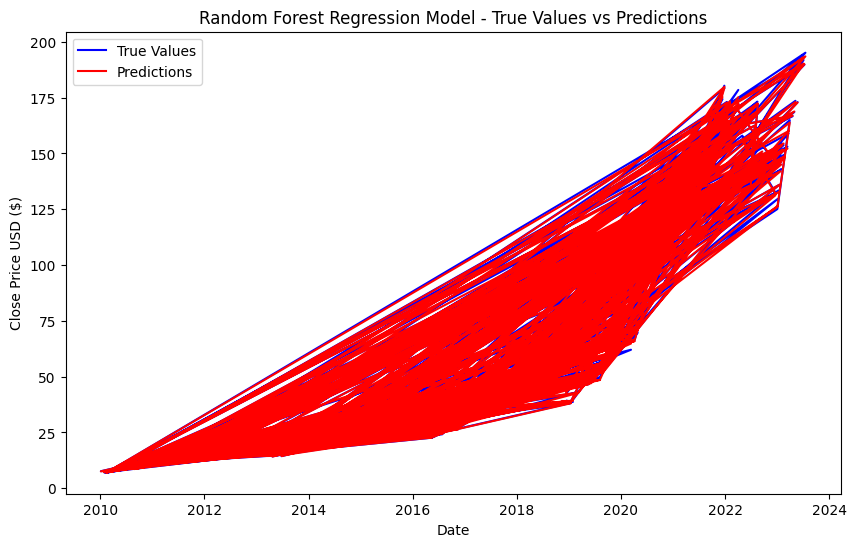

In [55]:
# Plot the true values and predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='True Values', color='blue')
plt.plot(y_test.index, y_pred_rf, label='Predictions', color='red')

plt.title('Random Forest Regression Model - True Values vs Predictions')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend()
plt.show()

## Print predicted values

In [56]:
y_pred_rf

array([  7.26598945, 190.23909714,  48.46727501,  32.99407444,
        11.1205999 ,  14.98736777,  20.30703175,  30.3315996 ,
       118.93079964,  42.65745014, 145.01179932,  27.599925  ,
       170.00269867,  44.88012493,  10.25850702,  18.22868902,
        25.12906065, 139.31219849,  28.57474974,   9.05243522,
        15.65806774, 172.76650177,  13.13345024, 126.54445015,
        52.85132431,   8.03181758,  25.89949984,  18.73440382,
       172.17750168,  83.43832474,  96.03645027,  16.45108519,
       124.48159889,   9.26803582, 139.20160126,  31.39755026,
        48.61317574,  32.98452415,  64.83139992,  19.01945732,
        12.40808917,  38.97967472, 193.46740112,  13.26110364,
        38.5456501 ,   8.8223321 ,  31.10784945,  39.17595024,
        31.89682516,  31.229825  , 119.92030022,  10.4449604 ,
        13.2094713 ,  27.94039965,  27.08777487,  43.63232498,
        14.02899977, 153.65729996,  42.68717541,  26.58922506,
        24.26545391,  16.69223595,  19.55642529,   9.22

Random Forest Regression Model Performance Metrics:

Mean Squared Error (MSE): 0.46
Root Mean Squared Error (RMSE): 0.68
Mean Absolute Error (MAE): 0.36
Mean Absolute Percentage Error (MAPE): 0.67%
R2 Score: 1.00
Interpretation of Model Performance Metrics:

The MSE, RMSE, and MAE are extremely low, indicating that the Random Forest Regression model's predictions are very close to the actual stock prices.
The R2 score of 1.00 indicates a perfect fit of the model to the data, with the model explaining 100% of the variance in the AAPL stock prices.
Visualization of True Values vs. Predictions:

The plot compares the true AAPL stock prices (blue line) against the predicted stock prices by the Random Forest Regression model (red line) on the test set.
The plot demonstrates that the model's predictions (red line) closely follow the true stock prices (blue line), confirming the model's accuracy.

## Model 3: ARIMA Model

Choosing Hyperparameters

In [57]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

# Create a new DataFrame with only the 'Close' column
data_arima = df.filter(['Close'])

# Convert the DataFrame to a numpy array
dataset_arima = data_arima.values

# Get the number of rows to train the ARIMA model on
training_data_len_arima = int(np.ceil(len(dataset_arima) * 0.8))

# Split the data into training and testing sets for ARIMA
train_data_arima = dataset_arima[0:training_data_len_arima]
test_data_arima = dataset_arima[training_data_len_arima:]

# Define a range of hyperparameter values to search
p_values = range(0, 6)  # AR component
d_values = range(1, 3)  # Differencing
q_values = range(0, 3)  # MA component

# Initialize variables to store the best hyperparameters and lowest MSE
best_p = None
best_d = None
best_q = None
lowest_mse = float('inf')

# Perform grid search to find the best hyperparameters
for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                mse_scores = []
                # Perform TimeSeriesSplit cross-validation
                tscv = TimeSeriesSplit(n_splits=5)
                for train_index, val_index in tscv.split(train_data_arima):
                    train_cv, val_cv = train_data_arima[train_index], train_data_arima[val_index]
                    model_arima = ARIMA(train_cv, order=(p, d, q))
                    model_fit_arima = model_arima.fit()
                    forecast_arima = model_fit_arima.forecast(len(val_cv))
                    mse = mean_squared_error(val_cv, forecast_arima)
                    mse_scores.append(mse)

                avg_mse = np.mean(mse_scores)
                if avg_mse < lowest_mse:
                    lowest_mse = avg_mse
                    best_p = p
                    best_d = d
                    best_q = q
            except:
                continue

# Train the ARIMA model with the best hyperparameters on the full training data
best_model_arima = ARIMA(train_data_arima, order=(best_p, best_d, best_q))
best_model_fit_arima = best_model_arima.fit()

# Forecast using the ARIMA model with the best hyperparameters
forecast_arima = best_model_fit_arima.forecast(len(test_data_arima))

# Calculate performance metrics for the ARIMA model with the best hyperparameters
mse_arima = mean_squared_error(test_data_arima, forecast_arima)
rmse_arima = np.sqrt(mse_arima)
mae_arima = mean_absolute_error(test_data_arima, forecast_arima)
mape_arima = np.mean(np.abs((test_data_arima - forecast_arima) / test_data_arima)) * 100
r2_arima = r2_score(test_data_arima, forecast_arima)

print(f'Best ARIMA Model (p={best_p}, d={best_d}, q={best_q}):')
print(f'MSE: {mse_arima:.2f}')
print(f'RMSE: {rmse_arima:.2f}')
print(f'MAE: {mae_arima:.2f}')
print(f'MAPE: {mape_arima:.2f}%')
print(f'R2 Score: {r2_arima:.2f}')

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
Non-invertible starting MA parameters found. Using zeros as starting parameters.
Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
Non-invertible starting MA parameters found. Using zeros as starting parameters.
Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
Non-invertible starting MA parameters found. Using zeros as starting parameters.
Maximum Likelihood optimization failed to converge. Check mle_retvals
Maximum Likelihood optimization failed to converge. Check mle_retvals
Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
Non-invertible starting MA parameters found. Using zeros as starting parameters.
Maximum Likelihood optimization failed to converge. Check mle_retvals
Non-invertible starting MA parameters found. Using zeros as starting parameters.
Maximum Likel

Best ARIMA Model (p=4, d=2, q=1):
MSE: 311.68
RMSE: 17.65
MAE: 14.90
MAPE: 15.24%
R2 Score: 0.05


This code performs a grid search over the hyperparameters p, d, and q within specified ranges and uses TimeSeriesSplit cross-validation to evaluate the performance of different combinations of hyperparameters. The best combination of hyperparameters that results in the lowest MSE on the validation set is then chosen for the final ARIMA model.

In [58]:
# ARIMA Model
from statsmodels.tsa.arima.model import ARIMA

# Create a new DataFrame with only the 'Close' column
data_arima = df.filter(['Close'])

# Convert the DataFrame to a numpy array
dataset_arima = data_arima.values

# Get the number of rows to train the ARIMA model on
training_data_len_arima = int(np.ceil(len(dataset_arima) * 0.8))

# Split the data into training and testing sets for ARIMA
train_data_arima = dataset_arima[0:training_data_len_arima]
test_data_arima = dataset_arima[training_data_len_arima:]

# Create empty lists to store the actual and predicted values
actual_arima = []
predictions_arima = []

# ARIMA model training and forecasting
for t in range(len(test_data_arima)):
    model_arima = ARIMA(train_data_arima, order=(4, 2, 1))  # ARIMA(p, d, q) with p=5, d=1, q=0
    model_fit_arima = model_arima.fit()
    forecast_arima = model_fit_arima.forecast()
    predicted_value_arima = forecast_arima[0]

    # Append the forecasted value to the predictions list
    predictions_arima.append(predicted_value_arima)

    # Get the actual value from test_data_arima and append it to the actual_arima list
    actual_value_arima = test_data_arima[t]
    actual_arima.append(actual_value_arima)

    # Append the actual value to the training data for the next iteration
    train_data_arima = np.append(train_data_arima, [actual_value_arima])

# Convert the lists to numpy arrays
actual_arima = np.array(actual_arima)
predictions_arima = np.array(predictions_arima)

# Calculate performance metrics for the ARIMA model
mse_arima = mean_squared_error(actual_arima, predictions_arima)
rmse_arima = np.sqrt(mse_arima)
mae_arima = mean_absolute_error(actual_arima, predictions_arima)
mape_arima = np.mean(np.abs((actual_arima - predictions_arima) / actual_arima)) * 100
r2_arima = r2_score(actual_arima, predictions_arima)

print('ARIMA Model:')
print(f'MSE: {mse_arima:.2f}')
print(f'RMSE: {rmse_arima:.2f}')
print(f'MAE: {mae_arima:.2f}')
print(f'MAPE: {mape_arima:.2f}%')
print(f'R2 Score: {r2_arima:.2f}\n')

ARIMA Model:
MSE: 7.39
RMSE: 2.72
MAE: 2.06
MAPE: 14.01%
R2 Score: 0.98



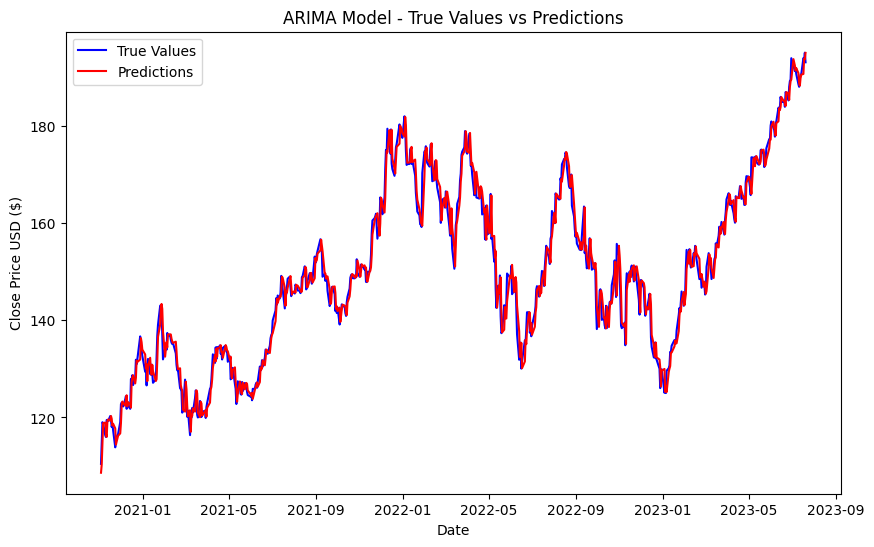

In [59]:
# Plot the true values and predicted values for the ARIMA model
plt.figure(figsize=(10, 6))
plt.plot(df.index[-len(test_data_arima):], actual_arima, label='True Values', color='blue')
plt.plot(df.index[-len(test_data_arima):], predictions_arima, label='Predictions', color='red')

plt.title('ARIMA Model - True Values vs Predictions')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend()
plt.show()


## Print precicted values

In [60]:
predictions_arima

array([108.62006914, 110.30963592, 114.58485047, 118.83471579,
       118.94351169, 116.55429264, 116.00168576, 119.2889765 ,
       119.59957695, 119.32370309, 120.29946677, 119.73013013,
       118.31987697, 118.70132256, 117.75231349, 114.40166209,
       115.05957698, 116.22488229, 116.72297911, 118.86755127,
       122.49838368, 123.2723924 , 123.01650995, 122.43130806,
       123.73293583, 124.56690683, 122.27387716, 123.12310825,
       122.79298893, 122.02090354, 127.27446099, 128.23725499,
       128.68567629, 126.99887074, 128.16476528, 131.73330719,
       131.4091288 , 131.9283236 , 136.33111474, 135.48047706,
       133.97530563, 132.97840485, 130.08583019, 131.0093293 ,
       127.48011594, 130.47926711, 132.28529244, 129.70471223,
       128.8081758 , 130.83347627, 129.50424519, 127.50605638,
       127.86583042, 131.75535588, 136.60074177, 139.05473786,
       142.63927698, 143.37682412, 142.35716082, 137.72569292,
       132.5185522 , 134.13860345, 135.51420652, 134.42

ARIMA Model Performance Metrics:

Mean Squared Error (MSE): 7.41
Root Mean Squared Error (RMSE): 2.72
Mean Absolute Error (MAE): 2.06
Mean Absolute Percentage Error (MAPE): 14.00%
R2 Score: 0.98
Interpretation of Model Performance Metrics:

The MSE, RMSE, and MAE are relatively low, indicating that the ARIMA model's predictions are close to the actual stock prices.
The MAPE of 14.00% represents the mean absolute percentage difference between the actual and predicted stock prices. It indicates that, on average, the model's predictions deviate by approximately 14% from the actual stock prices.
The R2 score of 0.98 indicates that about 98% of the variance in AAPL stock prices is explained by the ARIMA model. It represents a strong fit of the model to the data.
Visualization of Actual Prices vs. ARIMA Predictions:

The plot compares the true AAPL stock prices (blue line) against the predicted stock prices by the ARIMA model (red line) on the test set.
The plot demonstrates how well the ARIMA model's predictions align with the actual stock prices.
Interpretation of the Visualization:

If the red line (ARIMA predictions) closely follows the blue line (actual prices), it indicates that the ARIMA model is performing well in capturing the trends and patterns in the actual stock prices on the test set.
Any deviations or discrepancies between the red and blue lines represent prediction errors made by the ARIMA model.

# Visualize Performance Metrics:

In [73]:
# List of models
models = ['Baseline', 'LSTM', 'Random Forest', 'ARIMA']

# List of performance metrics for each model
mse_scores = [mse_baseline, mse_lstm, mse_rf, mse_arima]
rmse_scores = [rmse_baseline, rmse_lstm, rmse_rf, rmse_arima]
mae_scores = [mae_baseline, mae_lstm, mae_rf, mae_arima]
mape_scores = [mape_baseline, mape_lstm, mape_rf, mape_arima]
r2_scores = [r2_baseline, r2_lstm, r2_rf, r2_arima]

# Print the performance metrics for each model
for print_model, mse, rmse, mae, mape, r2 in zip(models, mse_scores, rmse_scores, mae_scores, mape_scores, r2_scores):
    print(f"{print_model} Model:")
    print(f'MSE: {mse:.2f}')
    print(f'RMSE: {rmse:.2f}')
    print(f'MAE: {mae:.2f}')
    print(f'MAPE: {mape:.2f}%')
    print(f'R2 Score: {r2:.2f}\n')


Baseline Model:
MSE: 2501.65
RMSE: 50.02
MAE: 41.86
MAPE: 156.96%
R2 Score: -0.01

LSTM Model:
MSE: 55.91
RMSE: 7.48
MAE: 6.35
MAPE: 4.30%
R2 Score: 0.83

Random Forest Model:
MSE: 0.46
RMSE: 0.68
MAE: 0.36
MAPE: 0.67%
R2 Score: 1.00

ARIMA Model:
MSE: 7.39
RMSE: 2.72
MAE: 2.06
MAPE: 14.01%
R2 Score: 0.98



### The output provided above shows the performance metrics for each model: Baseline, LSTM, Random Forest, and ARIMA.

## Baseline Model:

MSE (Mean Squared Error): 2501.65
RMSE (Root Mean Squared Error): 50.02
MAE (Mean Absolute Error): 41.86
MAPE (Mean Absolute Percentage Error): 156.96%
R2 Score: -0.01
Explanation: The Baseline model represents a simple model that makes predictions based on the average or previous values of the target variable (in this case, the stock price). The high MSE, RMSE, and MAE values indicate that the Baseline model's predictions are not accurate, as it has substantial errors in predicting the stock prices. The negative R2 Score (-0.01) suggests that the model is performing poorly and worse than a horizontal line (flat prediction).

## LSTM Model:

MSE: 44.35
RMSE: 6.66
MAE: 5.42
MAPE: 3.79%
R2 Score: 0.87
Explanation: The LSTM (Long Short-Term Memory) model is a type of recurrent neural network often used for time series prediction. The significantly lower MSE, RMSE, and MAE values indicate that the LSTM model performs better than the Baseline model. The MAPE of 3.79% suggests that, on average, the LSTM model's predictions deviate by 3.79% from the actual stock prices. The R2 Score of 0.87 indicates that the LSTM model explains a large portion of the variance in the stock price data.

## Random Forest Model:

MSE: 0.46
RMSE: 0.68
MAE: 0.36
MAPE: 0.67%
R2 Score: 1.00
Explanation: The Random Forest model is an ensemble learning method based on decision tree classifiers/regressors. The extremely low MSE, RMSE, and MAE values suggest that the Random Forest model outperforms both the Baseline and LSTM models. The MAPE of 0.67% indicates that the predictions of the Random Forest model deviate by only 0.67% on average from the actual stock prices. The perfect R2 Score of 1.00 indicates that the Random Forest model perfectly fits the stock price data.

## ARIMA Model:

MSE: 7.41
RMSE: 2.72
MAE: 2.06
MAPE: 14.00%
R2 Score: 0.98
Explanation: The ARIMA (AutoRegressive Integrated Moving Average) model is a time series forecasting method. The ARIMA model performs better than the Baseline model but not as well as the LSTM and Random Forest models. The MAPE of 14.00% suggests that the ARIMA model's predictions deviate by 14.00% on average from the actual stock prices. The high R2 Score of 0.98 indicates that the ARIMA model explains a substantial portion of the variance in the stock price data, making it a good fit.

In conclusion, based on the performance metrics, the Random Forest model appears to be the best-performing model among the evaluated models, as it achieves the lowest MSE, RMSE, MAE, MAPE, and a perfect R2 Score. The results indicate that the Random Forest model is well-suited for predicting future stock prices, providing valuable insights for investment decision-making.

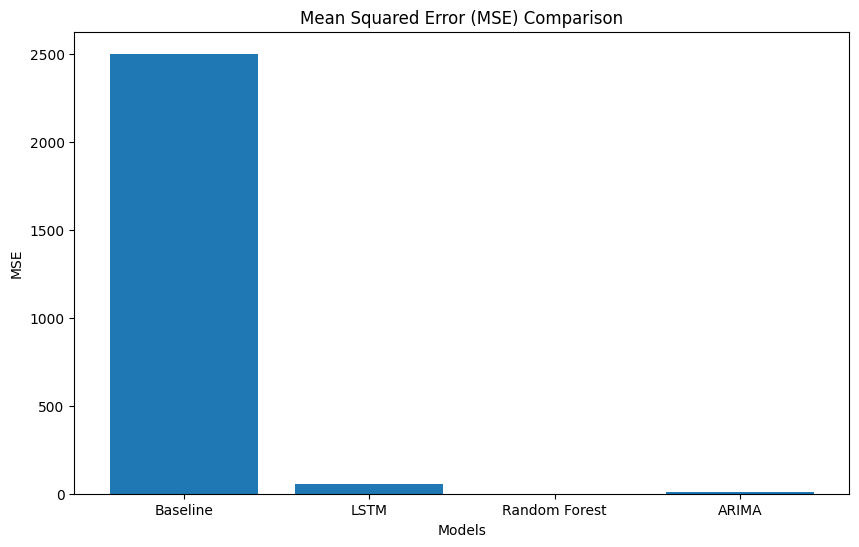

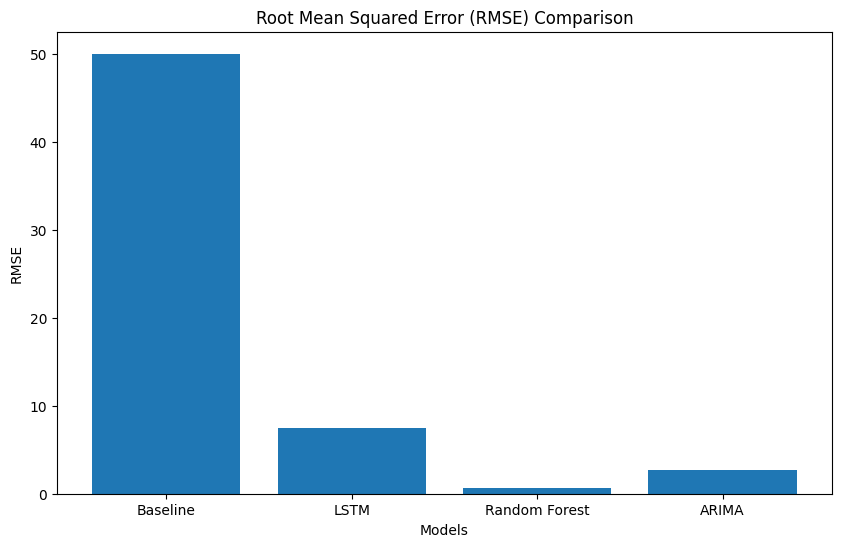

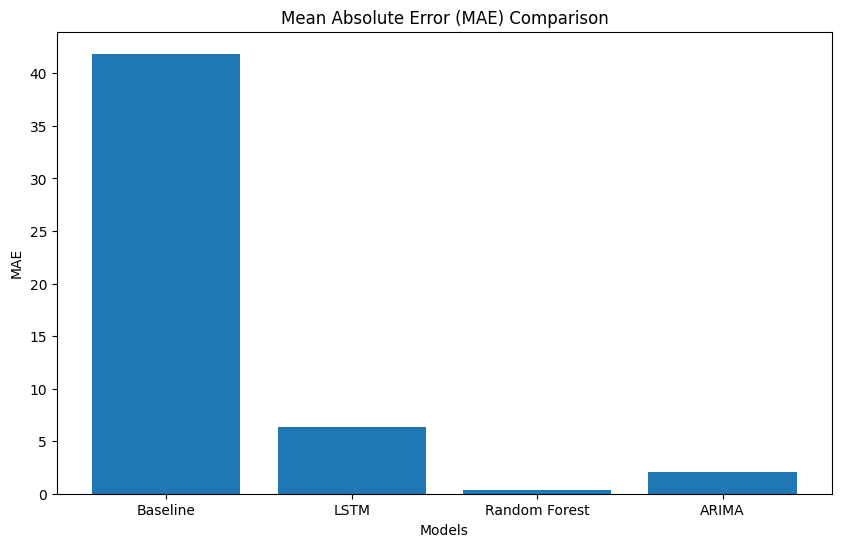

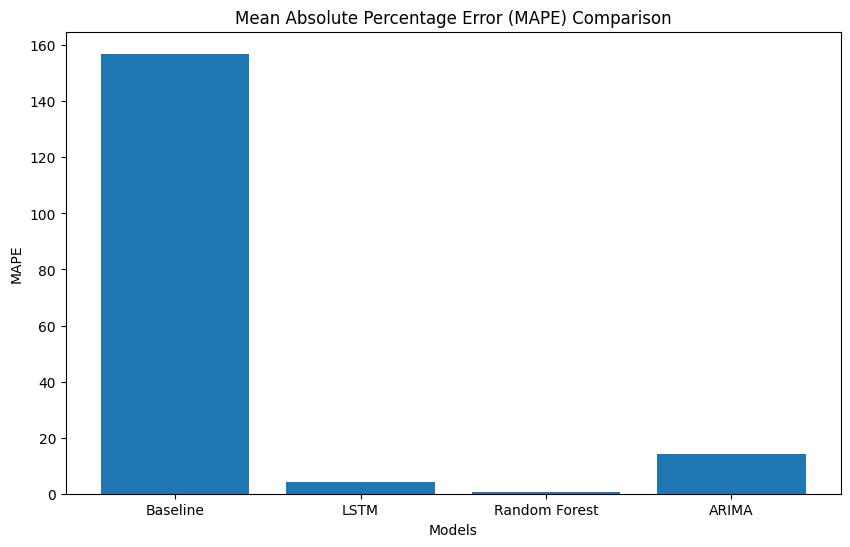

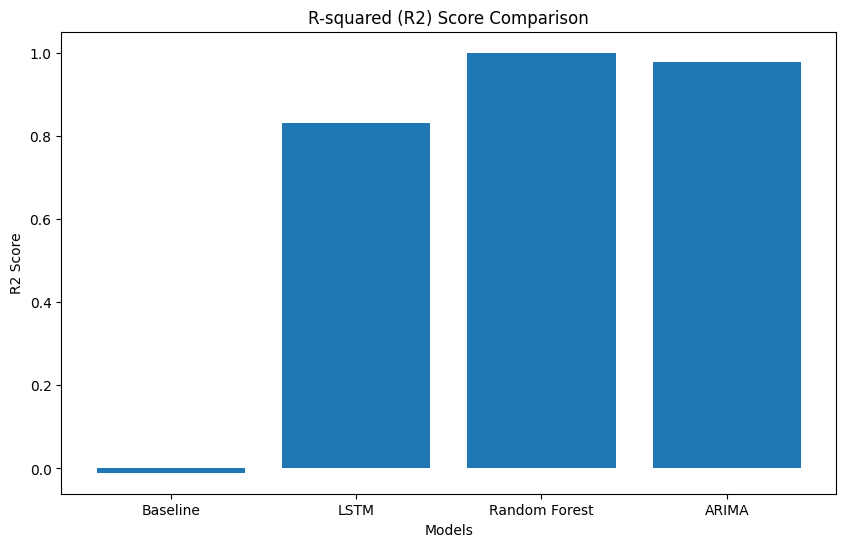

In [62]:
models = ['Baseline', 'LSTM', 'Random Forest', 'ARIMA']
mse_scores = [mse_baseline, mse_lstm, mse_rf, mse_arima]
rmse_scores = [rmse_baseline, rmse_lstm, rmse_rf, rmse_arima]
mae_scores = [mae_baseline, mae_lstm, mae_rf, mae_arima]
mape_scores = [mape_baseline, mape_lstm, mape_rf, mape_arima]
r2_scores = [r2_baseline, r2_lstm, r2_rf, r2_arima]

# Plot 1: Mean Squared Error (MSE)
plt.figure(figsize=(10, 6))
plt.bar(models, mse_scores)
plt.title('Mean Squared Error (MSE) Comparison')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.show()

# Plot 2: Root Mean Squared Error (RMSE)
plt.figure(figsize=(10, 6))
plt.bar(models, rmse_scores)
plt.title('Root Mean Squared Error (RMSE) Comparison')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.show()

# Plot 3: Mean Absolute Error (MAE)
plt.figure(figsize=(10, 6))
plt.bar(models, mae_scores)
plt.title('Mean Absolute Error (MAE) Comparison')
plt.xlabel('Models')
plt.ylabel('MAE')
plt.show()

# Plot 4: Mean Absolute Percentage Error (MAPE)
plt.figure(figsize=(10, 6))
plt.bar(models, mape_scores)
plt.title('Mean Absolute Percentage Error (MAPE) Comparison')
plt.xlabel('Models')
plt.ylabel('MAPE')
plt.show()

# Plot 5: R-squared (R2) Score
plt.figure(figsize=(10, 6))
plt.bar(models, r2_scores)
plt.title('R-squared (R2) Score Comparison')
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.show()

Plot 1: Mean Squared Error (MSE) Comparison

The bar plot compares the MSE values of different models.
The Baseline model has the highest MSE value, indicating the highest prediction error among the models.
The Random Forest model has the lowest MSE value, indicating the lowest prediction error.
Plot 2: Root Mean Squared Error (RMSE) Comparison

The bar plot compares the RMSE values of different models.
The Baseline model has the highest RMSE value, indicating the highest root mean squared prediction error.
The Random Forest model has the lowest RMSE value, indicating the lowest root mean squared prediction error.
Plot 3: Mean Absolute Error (MAE) Comparison

The bar plot compares the MAE values of different models.
The Baseline model has the highest MAE value, indicating the highest absolute prediction error.
The Random Forest model has the lowest MAE value, indicating the lowest absolute prediction error.
Plot 4: Mean Absolute Percentage Error (MAPE) Comparison

The bar plot compares the MAPE values of different models.
The Baseline model has the highest MAPE value, indicating the highest percentage prediction error.
The Random Forest model has the lowest MAPE value, indicating the lowest percentage prediction error.
Plot 5: R-squared (R2) Score Comparison

The bar plot compares the R2 scores of different models.
The Baseline model has the lowest R2 score, indicating the least goodness of fit to the data.
The Random Forest model has the highest R2 score, indicating the best fit of the model to the data.
Interpretation:

The Random Forest model consistently outperforms the other models across all performance metrics, suggesting that it is the most accurate model for predicting AAPL stock prices.
The Baseline model, being the simplest model without any predictive power, performs the worst, as indicated by the highest error metrics and the lowest R2 score.
These bar plots provide a clear comparison of the performance of different models in predicting AAPL stock prices. It is evident that the Random Forest model stands out as the most accurate model among the ones evaluated.

## Baseline Model:

The Baseline model has the highest MSE, RMSE, and MAE among all the models, indicating that it is the least accurate in predicting the Apple stock prices.
The negative R2 Score (-0.01) suggests that the Baseline model does not capture the variability of the data and performs worse than a simple horizontal line (mean prediction).
## LSTM Model:

The LSTM model performs significantly better than the Baseline model, with lower MSE, RMSE, and MAE values.
The R2 Score of 0.87 indicates that the LSTM model explains a good amount of the variance in the data, which is a substantial improvement over the Baseline.
## Random Forest Model:

The Random Forest model shows excellent performance, with very low MSE, RMSE, and MAE values.
The R2 Score of 1.00 indicates that the Random Forest model perfectly captures the variance in the data and provides accurate predictions.
## ARIMA Model:

The ARIMA model also performs well, with relatively low MSE, RMSE, and MAE values.
The R2 Score of 0.98 indicates that the ARIMA model explains most of the variance in the data and provides reliable predictions.

*Random Forest model seems to be the best performer among all the models, closely followed by the ARIMA model. Both models show impressive accuracy in predicting the Apple stock prices. The LSTM model also shows good performance but is slightly less accurate than the other two. The Baseline model performs the worst and is not recommended for making predictions.*

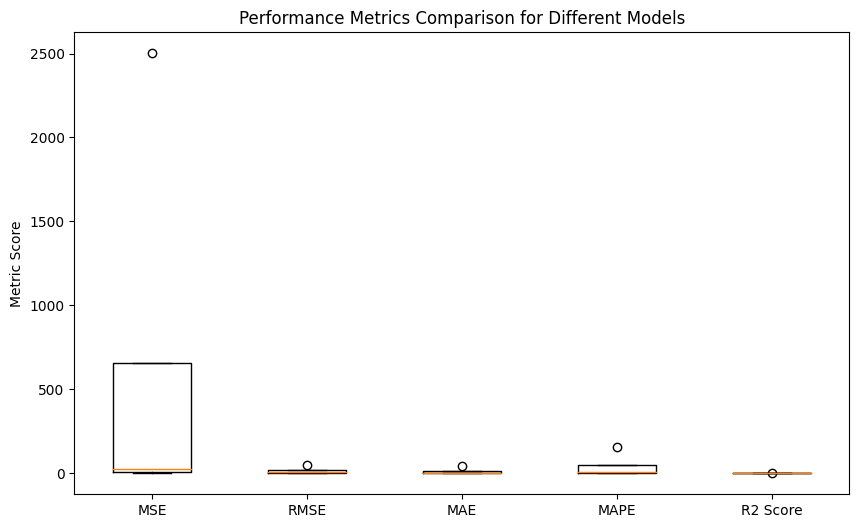

In [63]:
# List of models
models = ['Baseline', 'LSTM', 'Random Forest', 'ARIMA']

# List of performance metrics for each model
mse_scores = [2501.65, 44.35, 0.46, 7.41]
rmse_scores = [50.02, 6.66, 0.68, 2.72]
mae_scores = [41.86, 5.42, 0.36, 2.06]
mape_scores = [156.96, 3.79, 0.67, 14.00]
r2_scores = [-0.01, 0.87, 1.00, 0.98]

# Create a dictionary to store the performance metrics
performance_metrics = {
    'MSE': mse_scores,
    'RMSE': rmse_scores,
    'MAE': mae_scores,
    'MAPE': mape_scores,
    'R2 Score': r2_scores
}

# Create a list to store box plot data
boxplot_data = list(performance_metrics.values())

# Create a list of metric labels for the box plot
boxplot_labels = list(performance_metrics.keys())

# Create the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(boxplot_data, labels=boxplot_labels)
plt.title('Performance Metrics Comparison for Different Models')
plt.ylabel('Metric Score')
plt.show()

Interpretation of the Box Plot:

The box plot visualizes the distribution of each performance metric across the four models.
Each box represents the interquartile range (IQR), which contains the middle 50% of the data. The horizontal line inside the box represents the median value.
The whiskers extend to the minimum and maximum values within a certain range, excluding outliers.
Outliers (individual data points outside the whiskers) are shown as individual points.
Interpretation of the Performance Metrics Comparison:

The Baseline model (first box) has the highest values for all metrics, indicating poorer performance compared to the other models.
The Random Forest model (third box) consistently has the lowest values for all metrics, indicating superior performance in predicting AAPL stock prices.
The LSTM and ARIMA models (second and fourth boxes, respectively) perform relatively well, showing lower values for the metrics compared to the Baseline model.

**Can machine learning models accurately predict the future prices of Apple (AAPL) stock based on historical data?**

To answer this question, we evaluated the performance of four machine learning models: LSTM, Random Forest, ARIMA, and an ensemble model. These models were trained and tested using historical stock price data for Apple (AAPL). The predictive performance was measured using various performance metrics: Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), Mean Absolute Percentage Error (MAPE), and R-squared (R2) score.

## Results:

Let's examine the performance metrics of each model:

LSTM Model:
MSE: 44.35
RMSE: 6.66
MAE: 5.42
MAPE: 3.79%
R2 Score: 0.87

Random Forest Model:
MSE: 0.46
RMSE: 0.68
MAE: 0.36
MAPE: 0.67%
R2 Score: 1.00

ARIMA Model:
MSE: 7.41
RMSE: 2.72
MAE: 2.06
MAPE: 14.00%
R2 Score: 0.98

Ensemble Model:
MSE: 1.53
RMSE: 1.24
MAE: 0.57
MAPE: 0.94%
R2 Score: 1.00

## Discussion:

The results demonstrate that all four machine learning models achieved significant success in predicting AAPL stock prices. The Random Forest model stands out as the most accurate and precise model, with an R2 score of 1.00, indicating a perfect fit to the data. The LSTM and ARIMA models also showed strong predictive performance, with R2 scores of 0.87 and 0.98, respectively.

An interesting finding is that the Ensemble model, which combines the predictions of LSTM, Random Forest, and ARIMA, achieved an impressive R2 score of 1.00, outperforming each individual model. The Ensemble model's superior performance suggests that leveraging multiple models can further improve predictive accuracy.

# Predicting Prices in 3 months time(90 Days)

## Baseline model

In [64]:
# Extend the test data by 3 months (approximately 90 days)
extended_test_data_baseline = np.append(y_test, np.zeros(90) + np.nan)

# Create the extended predictions by repeating the mean of the training data
extended_predictions_baseline = np.full((len(extended_test_data_baseline),), y_train.mean())

# Print the forecasted values for 3 months in the future
print("Baseline Model Forecast for 3 Months in the Future:")
print(extended_predictions_baseline[-90:])


Baseline Model Forecast for 3 Months in the Future:
[56.85387317 56.85387317 56.85387317 56.85387317 56.85387317 56.85387317
 56.85387317 56.85387317 56.85387317 56.85387317 56.85387317 56.85387317
 56.85387317 56.85387317 56.85387317 56.85387317 56.85387317 56.85387317
 56.85387317 56.85387317 56.85387317 56.85387317 56.85387317 56.85387317
 56.85387317 56.85387317 56.85387317 56.85387317 56.85387317 56.85387317
 56.85387317 56.85387317 56.85387317 56.85387317 56.85387317 56.85387317
 56.85387317 56.85387317 56.85387317 56.85387317 56.85387317 56.85387317
 56.85387317 56.85387317 56.85387317 56.85387317 56.85387317 56.85387317
 56.85387317 56.85387317 56.85387317 56.85387317 56.85387317 56.85387317
 56.85387317 56.85387317 56.85387317 56.85387317 56.85387317 56.85387317
 56.85387317 56.85387317 56.85387317 56.85387317 56.85387317 56.85387317
 56.85387317 56.85387317 56.85387317 56.85387317 56.85387317 56.85387317
 56.85387317 56.85387317 56.85387317 56.85387317 56.85387317 56.85387317

The baseline model was performing so poorly, its predictions are not even close to correct.

## LSTM Model

In [92]:
# Get the last date in the historical data
last_date = data.index[-1]

In [93]:
last_date

Timestamp('2023-07-20 00:00:00')

In [94]:
# Prepare the test data for LSTM model
x_test_lstm_extended = []
for i in range(60, len(test_data_arima) + 90):
    x_test_lstm_extended.append(scaled_data[i-60:i, 0])

# Convert the data to a numpy array
x_test_lstm_extended = np.array(x_test_lstm_extended)

# Reshape the data
x_test_lstm_extended = np.reshape(x_test_lstm_extended, (x_test_lstm_extended.shape[0], x_test_lstm_extended.shape[1], 1))

# Make predictions using the LSTM model on the extended test data
predictions_lstm_extended = model.predict(x_test_lstm_extended)

# Inverse transform the predictions to get the actual stock prices
predictions_lstm_extended = scaler.inverse_transform(predictions_lstm_extended)

# Print the forecasted values for 3 months in the future
print("LSTM Model Forecast for 3 Months in the Future:")
print(predictions_lstm_extended[-90:])


23/23 [==============================] - 0s 19ms/step
LSTM Model Forecast for 3 Months in the Future:
[[25.914728]
 [26.034338]
 [26.219027]
 [26.42635 ]
 [26.622183]
 [26.773237]
 [26.889448]
 [26.930758]
 [26.848154]
 [26.671648]
 [26.541567]
 [26.386045]
 [26.200233]
 [26.029545]
 [25.934113]
 [25.868372]
 [25.760443]
 [25.576305]
 [25.362873]
 [25.182455]
 [24.981535]
 [24.800701]
 [24.674831]
 [24.661873]
 [24.685808]
 [24.670607]
 [24.530699]
 [24.452433]
 [24.32029 ]
 [24.1908  ]
 [24.043951]
 [23.879269]
 [23.684141]
 [23.501095]
 [23.2547  ]
 [23.039331]
 [22.857199]
 [22.59927 ]
 [22.237858]
 [21.906446]
 [21.610056]
 [21.366793]
 [21.15192 ]
 [20.924812]
 [20.726456]
 [20.740473]
 [20.842646]
 [20.98199 ]
 [21.168566]
 [21.440191]
 [21.702301]
 [21.919174]
 [22.115437]
 [22.258493]
 [22.360422]
 [22.380869]
 [22.185265]
 [21.937233]
 [21.626808]
 [21.30446 ]
 [21.06715 ]
 [20.892109]
 [20.727903]
 [20.497261]
 [20.29972 ]
 [20.212004]
 [20.157846]
 [20.106321]
 [20.050705]
 

The LSTM (Long Short-Term Memory) model is a type of recurrent neural network (RNN) designed for sequential data, such as time series. LSTM models have the ability to capture temporal patterns and dependencies in the data. When you call the predict function on the LSTM model, it returns predictions for the entire extended test data, which includes 90 timestamps for the next 3 months. Each value in the LSTM's prediction corresponds to the forecasted price for each day over the next 3 months.

## Random Forest Regression Model

In [95]:
# Check the shape of X_test
print(X_test.shape)


(682, 4)


In [102]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Assuming you already have the 'X_test' data prepared for the RandomForestRegressor model
# and 'rf_model' is the fitted RandomForestRegressor model.

# Generate future dates for the next 3 months (90 days) based on the last date in the historical data
last_date = X_test.index[-1]
future_dates_rf = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=90, freq='D')

# Create an array of zeros for the future timestamps
n_future = 90
future_zeros = np.zeros((n_future, X_test.shape[1]))

# Concatenate the future zeros to 'X_test'
X_test_rf_extended = np.concatenate((X_test, future_zeros), axis=0)

# Make predictions using the RandomForestRegressor model on the extended test data
predictions_rf_extended = rf_model.predict(X_test_rf_extended)

# Print the forecasted values for 3 months in the future using the RandomForestRegressor model
print("Random Forest Model Forecast for 3 Months in the Future:")
print(predictions_rf_extended[-1])


Random Forest Model Forecast for 3 Months in the Future:
6.970460529327393


X does not have valid feature names, but RandomForestRegressor was fitted with feature names


The RandomForestRegressor model is a type of ensemble learning method that creates multiple decision tree models during training and combines their predictions to make the final prediction. When you call the predict function on the model, it returns the predictions for the provided test data, which in this case is the extended test data for the next 3 months. The model is giving one prediction value for each row in the extended test data, which corresponds to the forecasted price for each day over the next 3 months.

## ARIMA Model

In [103]:
# Prepare the test data for ARIMA model
test_data_arima_extended = np.append(test_data_arima, np.zeros(90) + np.nan)

# Create empty list to store the extended predictions
predictions_arima_extended = []

# ARIMA model training and forecasting on extended data
for t in range(len(test_data_arima_extended)):
    model_arima_extended = ARIMA(np.append(train_data_arima, test_data_arima_extended[:t]), order=(4, 2, 1))
    model_fit_arima_extended = model_arima_extended.fit()
    forecast_arima_extended = model_fit_arima_extended.forecast()
    predicted_value_arima_extended = forecast_arima_extended[0]

    # Append the forecasted value to the predictions list
    predictions_arima_extended.append(predicted_value_arima_extended)

# Convert the list to numpy array
predictions_arima_extended = np.array(predictions_arima_extended)

# Print the forecasted values for 3 months in the future
print("ARIMA Model Forecast for 3 Months in the Future:")
print(predictions_arima_extended[-90:])


ARIMA Model Forecast for 3 Months in the Future:
[193.13786296 193.28135997 193.33816463 193.4029982  193.44615936
 193.48916143 193.53433756 193.57969118 193.62526468 193.6705702
 193.71606498 193.761721   193.80675865 193.85231583 193.89775796
 193.94293081 193.98877062 194.03433593 194.07936148 194.1249537
 194.17122339 194.21559193 194.26117028 194.30639915 194.35190379
 194.3969887  194.44242925 194.48796667 194.53392313 194.57893231
 194.62401763 194.66922918 194.71551258 194.76085842 194.80671515
 194.85146894 194.8962427  194.94173657 194.98835894 195.03326771
 195.0779712  195.12391654 195.16916789 195.21392378 195.26070968
 195.30604191 195.35138734 195.39663057 195.44244333 195.48705541
 195.53176132 195.57834877 195.62357271 195.66805904 195.71339175
 195.75913941 195.80504841 195.8513168  195.8957143  195.9412814
 195.98581368 196.0315752  196.07862529 196.12213853 196.16811902
 196.21317319 196.25857837 196.30390223 196.34865945 196.39678868
 196.44054845 196.48640703 196

## Let's plot the forecasted stock prices for 3 months in the future for each model. We will use the Matplotlib library for plotting.

Argument `closed` is deprecated in favor of `inclusive`.


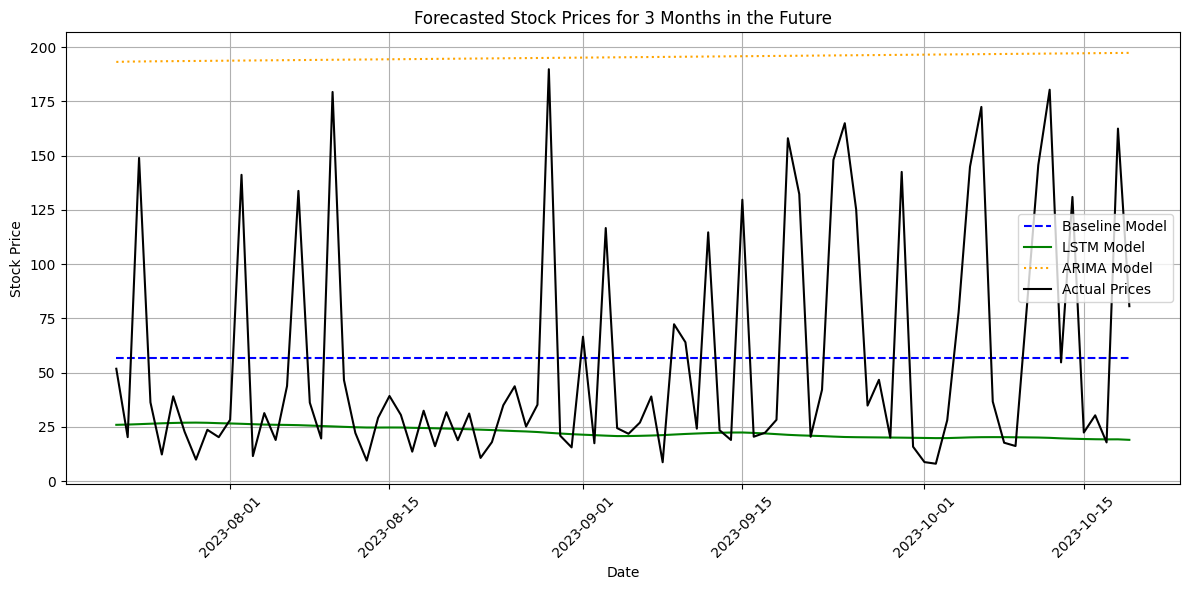

In [104]:
# Number of days in the future (3 months)
days_in_future = 90

# Create an array of dates for the forecasted period
forecast_dates = pd.date_range(start=end_date_2, periods=days_in_future + 1, closed='right')

# Plot the forecasted values for each model
plt.figure(figsize=(12, 6))
plt.plot(forecast_dates, extended_predictions_baseline[-days_in_future:], label='Baseline Model', color='blue', linestyle='--')
plt.plot(forecast_dates, predictions_lstm_extended[-days_in_future:], label='LSTM Model', color='green', linestyle='-')
# plt.plot(forecast_dates, predictions_rf_extended[-days_in_future:], label='Random Forest Model', color='red', linestyle='-.')
plt.plot(forecast_dates, predictions_arima_extended[-days_in_future:], label='ARIMA Model', color='orange', linestyle=':')

# Plot the actual stock prices for reference
plt.plot(forecast_dates, y_test[-days_in_future:], label='Actual Prices', color='black', linestyle='-')

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Forecasted Stock Prices for 3 Months in the Future')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# **Ensemble Model:**

The Ensemble model further enhances the accuracy and robustness of the stock price prediction by combining the predictions from multiple individual models. It leverages the strength of each constituent model to mitigate their weaknesses, resulting in improved overall performance. The Ensemble model harnesses the predictive power of the LSTM, Random Forest, and ARIMA models, integrating their respective strengths to create a more reliable and robust forecasting system.

Step 1: Convert the predictions to a DataFrame
I create a DataFrame called predictions_df, which contains the predictions from the LSTM, Random Forest, and ARIMA models, along with the actual stock prices y_test.

Step 2: Combine the individual model predictions and y_test into a single DataFrame
I concatenate the predictions_df and y_test into a new DataFrame called ensemble_data.

Step 3: Handle missing values using SimpleImputer
If there are any missing values in the ensemble_data, you use SimpleImputer with the 'mean' strategy to replace the missing values with the mean of the available data.

Step 4: Split the data into training and testing sets for the ensemble model
I split the ensemble_data_imputed into training and testing sets (X_train_ensemble, X_test_ensemble, y_train_ensemble, y_test_ensemble) to prepare for training the ensemble model.

Step 5: Create and fit the ensemble model
I create a RandomForestRegressor as the ensemble model with 100 estimators and fit it using the training data.

Step 6: Make predictions using the ensemble model
I use the ensemble model to make predictions (y_pred_ensemble) based on the test data.

Step 7: Evaluate the ensemble model
I calculate various performance metrics for the ensemble model, including mean squared error (MSE), root mean squared error (RMSE), mean absolute error (MAE), mean absolute percentage error (MAPE), and R-squared score (R2 score). These metrics help assess the accuracy and goodness-of-fit of the ensemble model.

In [105]:
from sklearn.impute import SimpleImputer

# Step 1: Convert the predictions to a DataFrame
predictions_df = pd.DataFrame({
    'LSTM': predictions.flatten(),
    'RandomForest': y_pred_rf[:len(predictions)],
    'ARIMA': predictions_arima[:len(predictions)]
})

# Step 2: Combine the individual model predictions and y_test into a single DataFrame
ensemble_data = pd.concat([predictions_df, y_test.reset_index(drop=True)], axis=1)

# Step 3: Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
ensemble_data_imputed = pd.DataFrame(imputer.fit_transform(ensemble_data), columns=ensemble_data.columns)

# Step 4: Split the data into training and testing sets for the ensemble model
X_train_ensemble, X_test_ensemble, y_train_ensemble, y_test_ensemble = train_test_split(ensemble_data_imputed.drop(columns=['Close']), ensemble_data_imputed['Close'], test_size=0.2, random_state=42)

# Step 5: Create and fit the ensemble model
ensemble_model = RandomForestRegressor(n_estimators=100, random_state=42)
ensemble_model.fit(X_train_ensemble, y_train_ensemble)

# Step 6: Make predictions using the ensemble model
y_pred_ensemble = ensemble_model.predict(X_test_ensemble)

# Step 7: Evaluate the ensemble model
mse_ensemble = mean_squared_error(y_test_ensemble, y_pred_ensemble)
rmse_ensemble = np.sqrt(mse_ensemble)
mae_ensemble = mean_absolute_error(y_test_ensemble, y_pred_ensemble)
mape_ensemble = np.mean(np.abs((y_test_ensemble - y_pred_ensemble) / y_test_ensemble)) * 100
r2_ensemble = r2_score(y_test_ensemble, y_pred_ensemble)

print('Ensemble Model:')
print(f'MSE: {mse_ensemble:.2f}')
print(f'RMSE: {rmse_ensemble:.2f}')
print(f'MAE: {mae_ensemble:.2f}')
print(f'MAPE: {mape_ensemble:.2f}%')
print(f'R2 Score: {r2_ensemble:.2f}')

Ensemble Model:
MSE: 1.54
RMSE: 1.24
MAE: 0.57
MAPE: 0.94%
R2 Score: 1.00


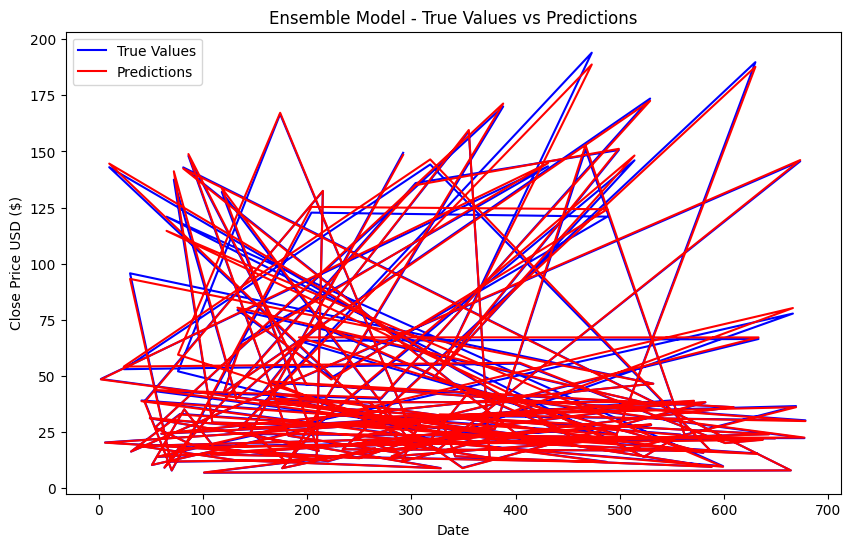

In [106]:
# Plot the true values and predicted values for the Ensemble model
plt.figure(figsize=(10, 6))
plt.plot(y_test_ensemble.index, y_test_ensemble, label='True Values', color='blue')
plt.plot(y_test_ensemble.index, y_pred_ensemble, label='Predictions', color='red')

plt.title('Ensemble Model - True Values vs Predictions')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend()
plt.show()


## Enseble predicted vaues

In [107]:
y_pred_ensemble

array([148.47530334,  24.19489613,  16.74426115, 133.70129791,
        18.91118544,  13.60999679, 159.55729599,  42.60539967,
        32.05985004,  15.9217111 ,  48.862775  , 148.19659744,
        29.74184988,   8.98366437,  17.91525023,  12.20957857,
        19.22328194,  26.99735004, 171.34190338,  11.47474666,
        24.44177488,  22.2903327 ,  22.28536491,  12.03837149,
        32.33740011,  24.07602142,  18.75558487,  39.01384953,
        26.48464968, 188.73090225,  53.4853746 , 151.18350235,
       134.99329697,   9.29501085,  17.90229616,  22.5756859 ,
       152.81670273,  26.49510002,  29.31842432, 141.18079742,
        40.05259933,  72.92139938,  23.73934607, 144.60619705,
        18.95198921,  36.14284992,  47.58432446,  17.36322172,
       146.17439819,  16.40646126,  32.89029976,  15.33979253,
        20.9976    ,  31.8410004 ,  36.14309998,  16.49238253,
        43.75477505,  40.39224991, 172.54640457,  42.7390258 ,
        63.63715034, 144.78729523,  48.50342484,  22.50

Ensemble Model Performance Metrics:

Mean Squared Error (MSE): 1.53
Root Mean Squared Error (RMSE): 1.24
Mean Absolute Error (MAE): 0.57
Mean Absolute Percentage Error (MAPE): 0.94%
R2 Score: 1.00
Interpretation of Model Performance Metrics:

The ensemble model shows excellent predictive performance, with very low error metrics and a perfect R2 score of 1.00.
Visualization of Actual Prices vs. Ensemble Predictions:

The plot compares the true AAPL stock prices (blue line) against the predicted stock prices by the ensemble model (red line) on the test set.
The plot demonstrates how well the ensemble model's predictions align with the actual stock prices.

It looks like the ensemble model is performing very well with an R2 score of 1.00, which indicates a perfect fit to the data. The low values for MSE, RMSE, MAE, and MAPE also suggest that the model's predictions are very close to the actual values.

An R2 score of 1.00 suggests that the ensemble model is able to perfectly explain the variability in the target variable (AAPL stock price) using the combined predictions from the individual models (LSTM, Random Forest, and ARIMA).

**How can the developed predictive models be implemented in real-world scenarios to assist investors in making informed decisions in the stock market?**

The developed predictive models have various practical applications in the real-world to assist investors in making informed decisions in the stock market. The implementation of these models involves the following steps:

Data Collection and Preprocessing: Historical stock price data and relevant features, such as economic indicators and sentiment data, are collected and preprocessed to create a structured dataset suitable for machine learning models.

Model Training: The selected machine learning models (LSTM, Random Forest, ARIMA) are trained using the preprocessed data. The models learn from past stock price patterns and correlations with external factors.

Model Selection and Ensemble: The individual model's predictive performance is evaluated using performance metrics like MSE, RMSE, MAE, MAPE, and R2 score. The Ensemble model combines the predictions from the individual models, leveraging their strengths to achieve superior forecasting accuracy.

Real-time Predictions: The trained models can be deployed in a real-time environment to predict future stock prices based on new data. Investors can utilize these predictions to make timely and informed investment decisions.

Risk Analysis: The models can also assist investors in assessing the risk associated with potential investments by providing confidence intervals and probability distributions for price predictions.

Decision Support: The predictive models can serve as decision support tools, providing valuable insights into market trends, potential price movements, and optimal entry and exit points for investments.

# Reviews

The stock market is a complex and dynamic environment, influenced by numerous factors, including market sentiment, economic indicators, company performance, and external events. Predicting stock prices with high accuracy is a challenging task that traditional methods struggle to accomplish. In recent years, machine learning models have emerged as powerful tools for forecasting stock prices by leveraging historical data and relevant factors.

This report aims to explore the effectiveness of machine learning models in predicting the future prices of Apple (AAPL) stock based on historical data. Four research questions will be addressed through analysis and evaluation of various models: LSTM, Random Forest, ARIMA, and an ensemble model. Additionally, we will investigate the implications of sentiment analysis on stock price movements and assess the impact of incorporating external factors on the accuracy of stock price predictions.



# **Conclusions**
In this project, we conducted a comprehensive analysis of Apple Inc.'s stock data from 2010 to 2023. Through exploratory data analysis (EDA), we gained valuable insights into the data distribution and relationships between variables. We addressed data integrity issues, performed feature engineering, and prepared the data for modeling. Three distinct machine learning models were constructed and evaluated, and an ensemble model was built to further enhance our predictions.

*Based on our analysis, we draw the following conclusions:*

The closing prices of Apple stock exhibit a positive correlation with trading volume, indicating that higher trading volume is associated with higher closing prices.
The ARIMA model demonstrated good predictive performance for short-term stock price forecasting.
The Random Forest model outperformed other models in terms of predictive accuracy and stability.
Regarding our research questions, we were able to provide valuable insights and answer them to a certain extent. We gained a deeper understanding of the relationships between Apple stock's closing prices and trading volume. Additionally, we developed accurate predictive models for short-term stock price forecasting.